# 🚀 GST Analytics Hackathon Project

Welcome to my project submission for the **GST Analytics Hackathon**! This project aims to develop an innovative predictive model that can accurately classify entities within the GST system. Leveraging cutting-edge techniques in machine learning, this project addresses a complex binary classification problem using a large dataset provided by the GST Analytics team.

## 📁 Project Overview

- **Objective**: To create a supervised learning model that predicts whether a specific entity is classified as "0" or "1" based on various features.
- **Dataset**: The dataset contains 900,000 records with 23 attributes, spread over training and testing sets.
- **Methodology**: The project involves data preprocessing, upsampling, model training, and evaluation using various performance metrics.
- **Tools & Technologies**: Python, scikit-learn, XGBoost, Pandas, Optuna, SMOTE and more.

## 🔍 Key Evaluation Metrics

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC Curve**
- **Confusion Matrix**

## 🌟 Why This Project?

This project not only showcases my technical skills in data science but also contributes to the development of solutions that can enhance the efficiency of the GST system in India.

Let's dive in! 💡


## 📘 Getting Started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# For upsampling the minority class
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn import metrics
from sklearn.calibration import CalibrationDisplay

from collections import Counter

import optuna # For hyperparameter tuning
optuna.logging.set_verbosity(optuna.logging.WARNING)

import joblib # To save model pickle files
import os

seed = 0          # Seed variable for random_state parameters
np.random.seed(0) # Setting random seed = 0

In [3]:
# Loading in the data 
# For validation, change the path for xtest and ytest variables

xtrain = pd.read_csv('data/X_Train_Data_Input.csv')
xtest  = pd.read_csv('data/X_Test_Data_Input.csv') # For validation, change this path to new x test data
ytrain = pd.read_csv('data/Y_Train_Data_Target.csv')
ytest  = pd.read_csv('data/Y_Test_Data_Target.csv') # For validation, change this path to new y test data

## 🔍 Exploratory Data Analysis

In [4]:
# Storing ID for later use

xtrain_id = xtrain['ID']
ytrain_id = ytrain['ID']
xtest_id = xtest['ID']
ytest_id = ytest['ID']

# Dropping ID column for EDA + Modelling purpose

xtrain.drop(columns = ['ID'], inplace=True)
ytrain.drop(columns = ['ID'], inplace=True)
xtest.drop(columns = ['ID'], inplace=True)
ytest.drop(columns = ['ID'], inplace=True)

In [5]:
xtrain.head(10).T

,0,1,2,3,4,5,6,7,8,9
Column0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
Column1,2495.000000,2495.000000,2495.000000,211.000000,718.000000,886.000000,2495.000000,2495.000000,657.000000,647.000000
Column2,3726.000000,3454.000000,4543.000000,59.000000,950.000000,2842.000000,2612.000000,3053.000000,137.000000,1678.000000
Column3,0.678139,0.452580,-1.577453,NaN,-2.028572,-1.126335,-2.028572,0.678139,-0.404545,-2.028572
Column4,0.701403,0.701403,-1.429540,NaN,-1.855728,-1.216445,-1.855728,0.701403,-0.321449,-1.571603
Column5,-0.007468,-0.007468,-0.007469,NaN,NaN,-0.007469,-0.007468,-0.007468,-0.007467,-0.007469
Column6,0.434190,1.554998,-0.407939,-0.407939,-0.407939,-0.407939,-0.402851,-0.094001,-0.407939,-0.407939
Column7,-0.015603,-0.015574,-0.015607,-0.015607,-0.015607,-0.015607,-0.015607,-0.015605,-0.015607,-0.015607
Column8,0.606265,0.329946,-0.774979,-0.774979,-0.774979,-0.774979,0.673163,0.136592,0.634026,-0.774979
Column9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
round(xtrain.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.44,1.16,0.00,0.00,0.00,0.00,18.00
Column1,785133.0,1321.79,907.27,-1080.00,515.00,1173.00,2435.00,2499.00
Column2,785133.0,2951.28,2143.14,-47.00,1129.00,2709.00,4472.00,10290.00
Column3,658830.0,-0.00,1.00,-2.03,-0.68,0.68,0.68,0.68
Column4,657423.0,-0.00,1.00,-1.86,-0.58,0.70,0.70,0.70
Column5,617953.0,-0.00,1.02,-0.01,-0.01,-0.01,-0.01,551.42
Column6,781283.0,-0.00,1.00,-0.41,-0.41,-0.41,-0.37,14.99
Column7,785133.0,0.00,1.05,-0.02,-0.02,-0.02,-0.02,201.69
Column8,781283.0,-0.00,1.06,-0.77,-0.77,0.12,0.63,323.99
Column9,52996.0,0.01,1.11,-0.09,-0.09,-0.08,-0.06,133.91


In [7]:
# DataFrame describing statistical trends for each column of the dataset

info_xtrain = pd.DataFrame({
    'Num of unique values': xtrain.nunique(),     # Number of unique values in each column
    'Standard Deviation': round(xtrain.std(), 2), # Standard deviation of each column
    'Variance': round(xtrain.var(), 2),           # Variance of each column
    '% of Null values': round(xtrain.isna().mean() * 100, 2),  # Percentage of NaN values in each column
    '% of unique populated values': round(xtrain.nunique()/(xtrain.shape[0]-xtrain.isna().sum()) * 100) # Percentage of unique not-null values for each column
})
info_xtrain

,Num of unique values,Standard Deviation,Variance,% of Null values,% of unique populated values
Column0,19,1.16,1.35,0.00,0.0
Column1,2564,907.27,823135.16,0.00,0.0
Column2,9424,2143.14,4593049.66,0.00,1.0
Column3,47,1.00,1.00,16.09,0.0
Column4,47,1.00,1.00,16.27,0.0
Column5,148334,1.02,1.03,21.29,24.0
Column6,157264,1.00,1.00,0.49,20.0
Column7,166513,1.05,1.09,0.00,21.0
Column8,355728,1.06,1.12,0.49,46.0
Column9,49650,1.11,1.23,93.25,94.0


In [8]:
# Parameters for visualizations

traces = {
    'marker_line_width': 1,
    'marker_line_color': 'black'
}

In [9]:
len(info_xtrain.index)

22

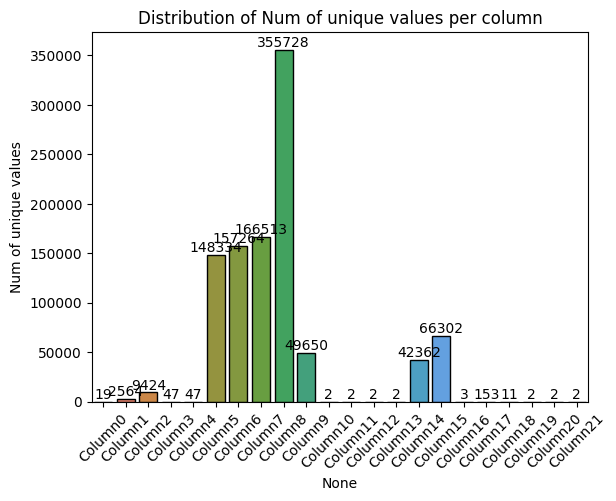

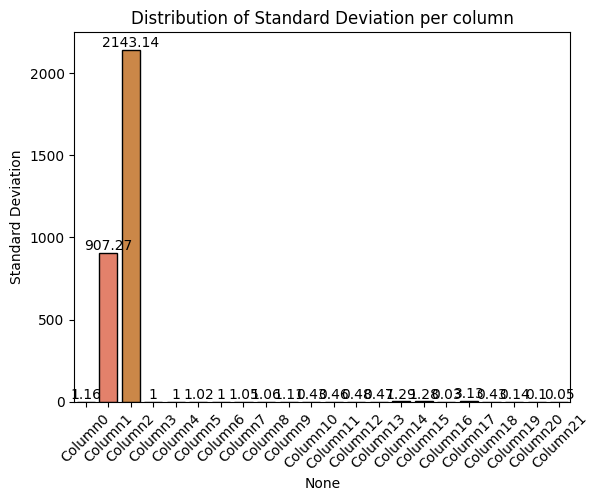

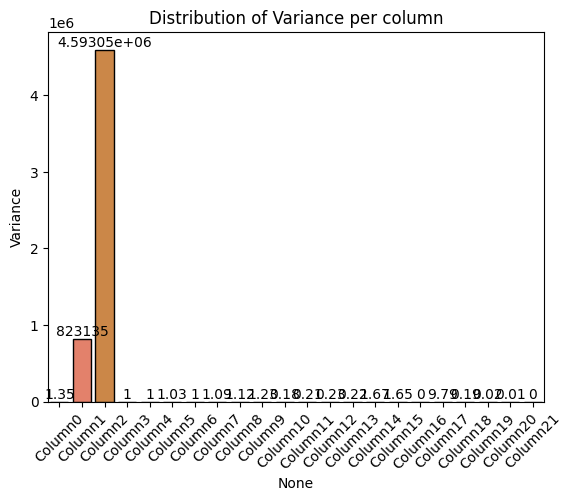

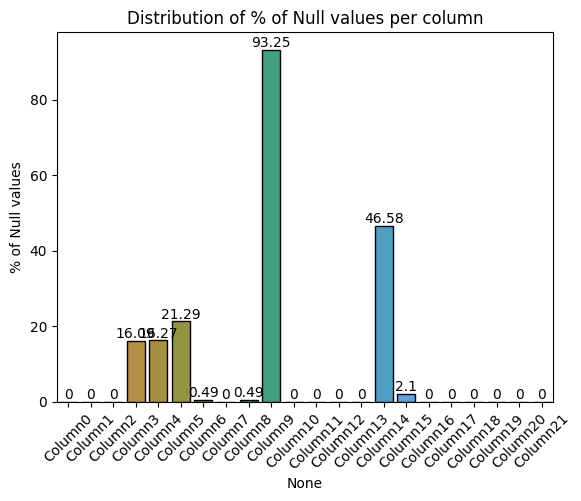

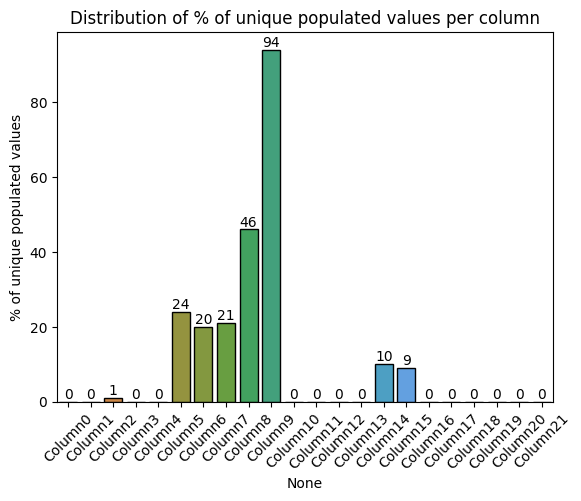

In [10]:
# Visualizations of the statistical trends of the dataset (info_xtrain)

for col in info_xtrain.columns:
    ax = sns.barplot(data = info_xtrain,
                     y = info_xtrain[col],
                     x = info_xtrain.index,
                     hue = info_xtrain.index,
                     linewidth = 1,
                     edgecolor = 'black')
    ax.set(title = f'Distribution of {col} per column')
    for x in range(0, len(info_xtrain.index)):
        ax.bar_label(ax.containers[x])
    
    plt.xticks(rotation=45)
    plt.show()

Based on the unique counts and the descriptive analytics of the features, we can infer that: <br><br>
=> Features with low percentage of unique values would be categorical features, and conversly, columns with a higher percentage of unique values would be numeric features.
- Columns `0 - 9 and 14-18` seem to be _numeric features_.
- Columns `10-13 and 19-21` seem to be encoded _categorical features_. 

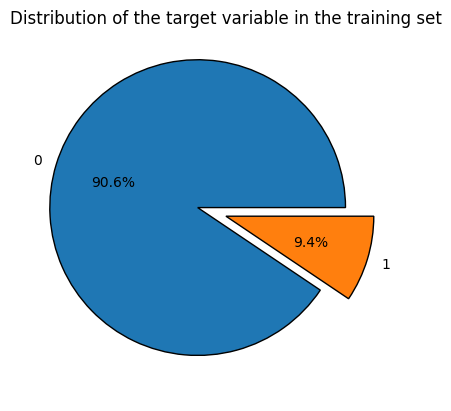

In [11]:
# Visualization of class distribution in the target variable

plt.pie(x = Counter(np.ravel(ytrain)).values(), 
        labels = Counter(np.ravel(ytrain)).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%',
        wedgeprops = {
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the training set')
plt.show()

### 📊 Visualizations for all columns in the training dataset

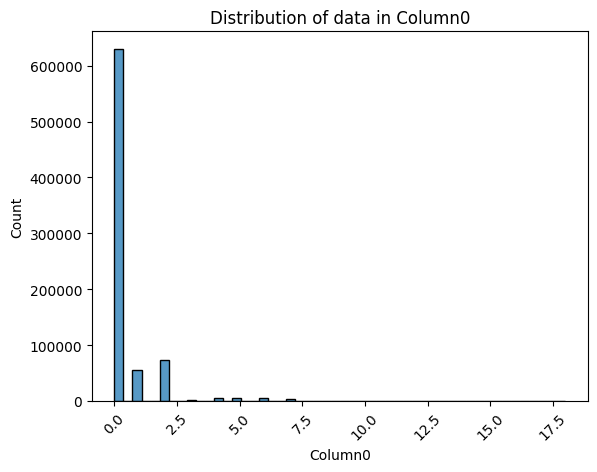

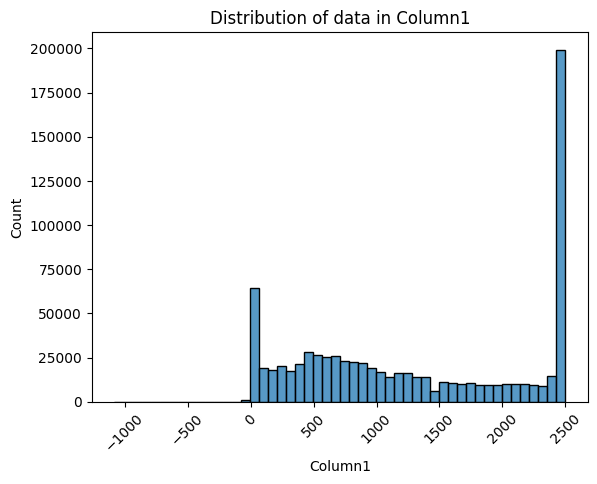

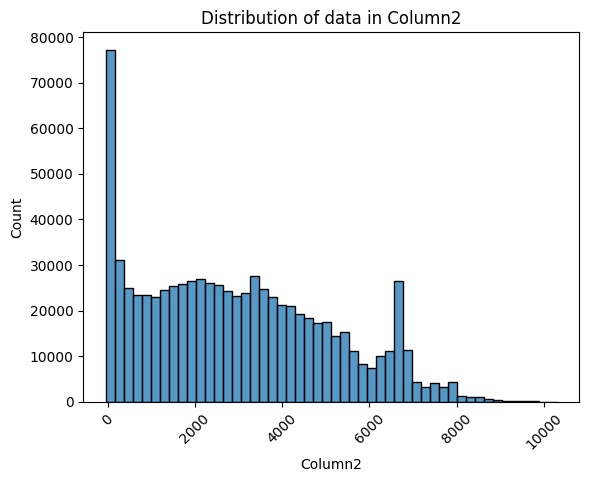

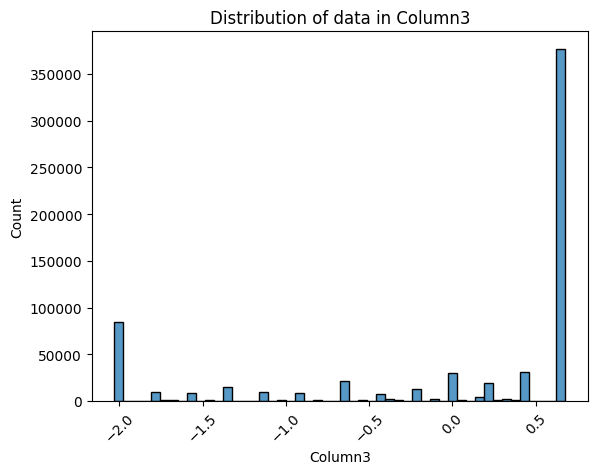

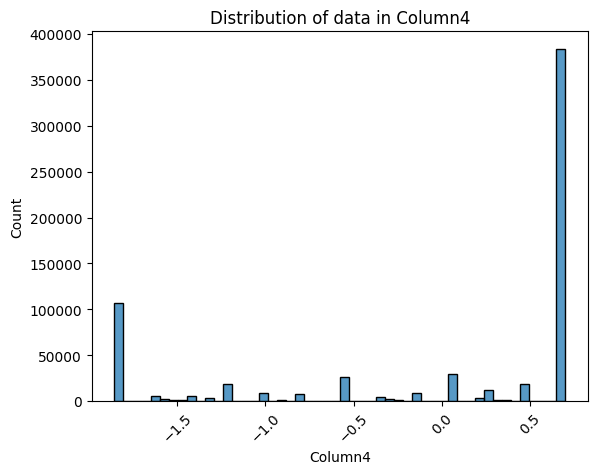

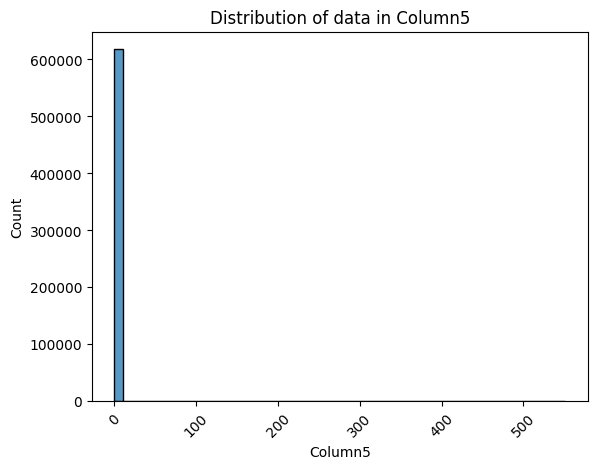

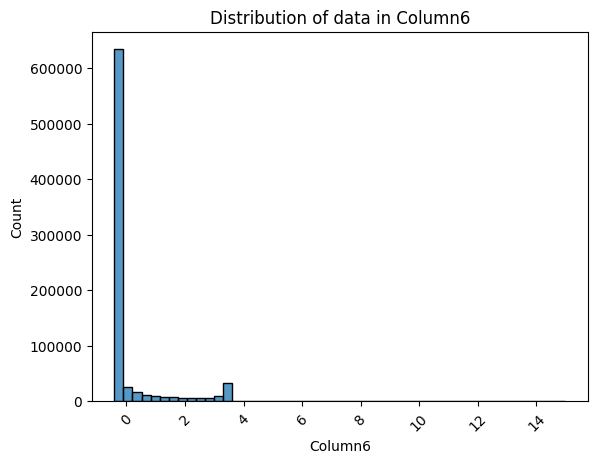

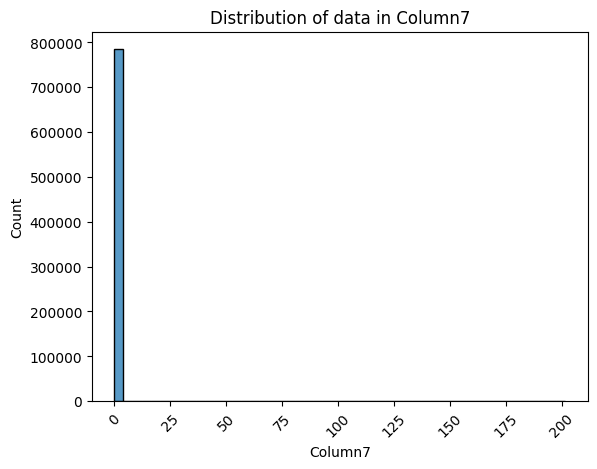

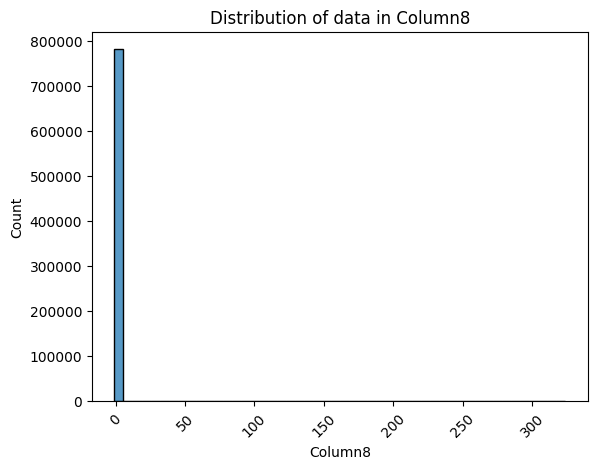

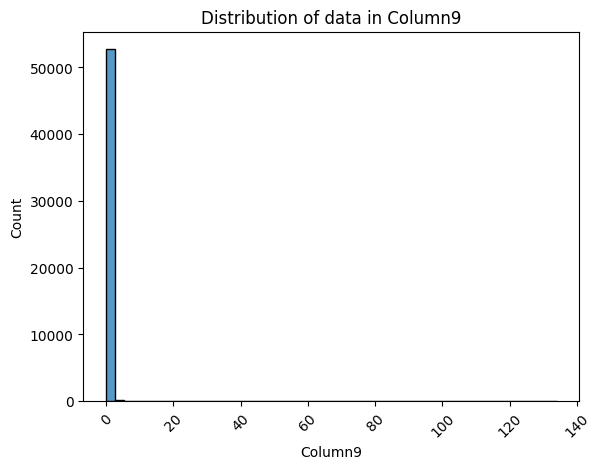

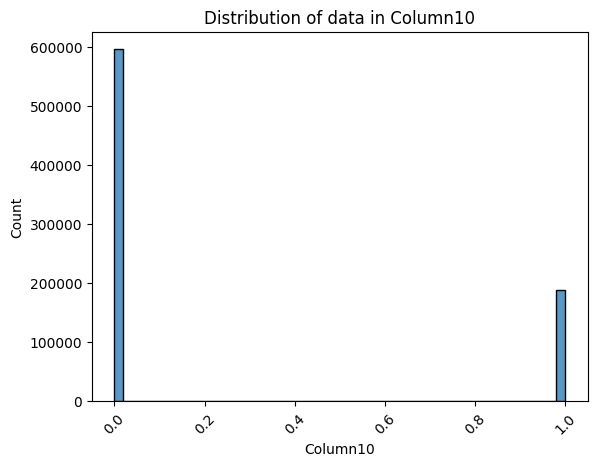

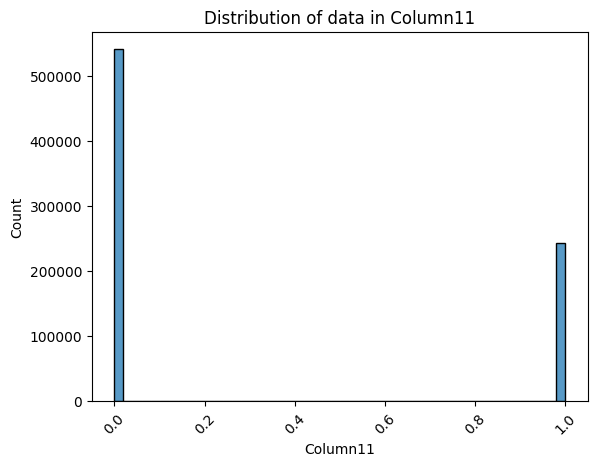

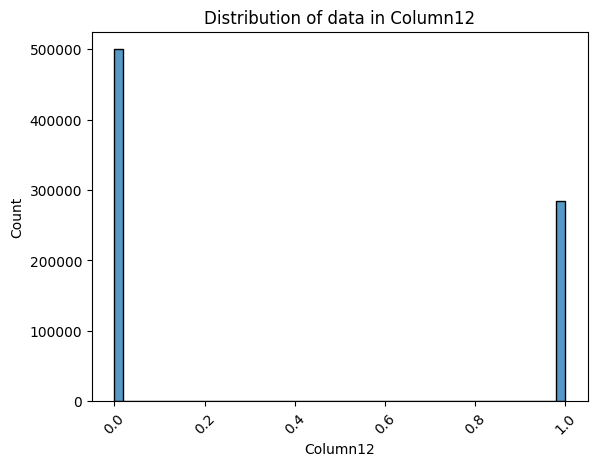

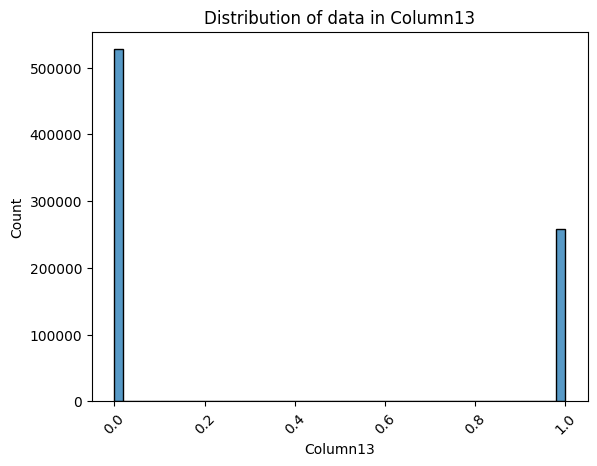

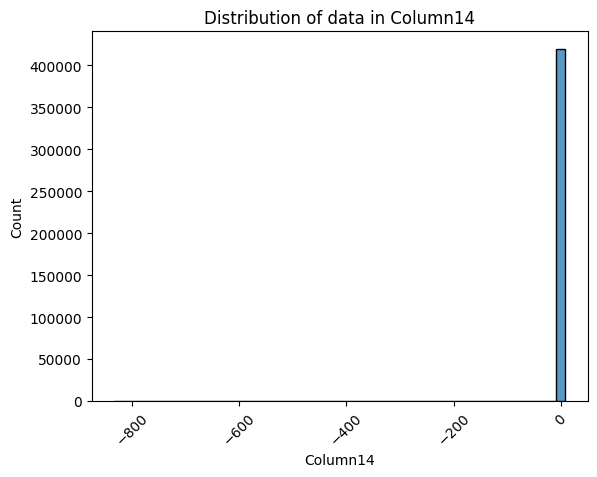

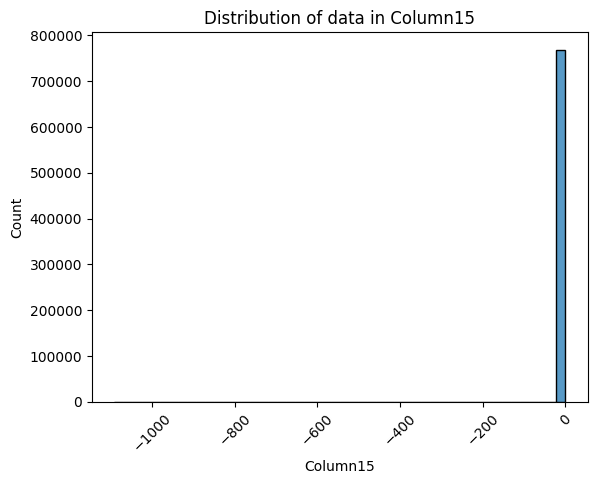

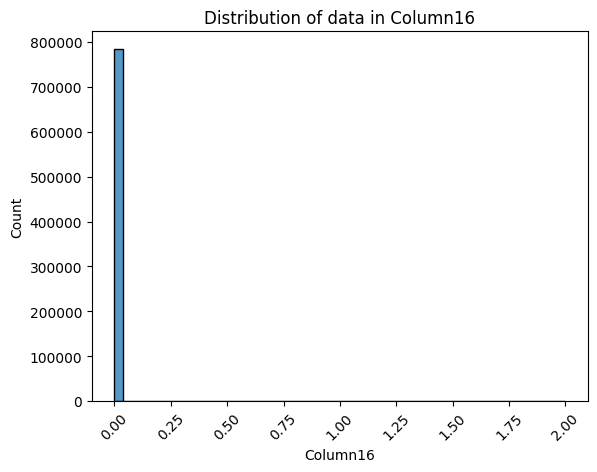

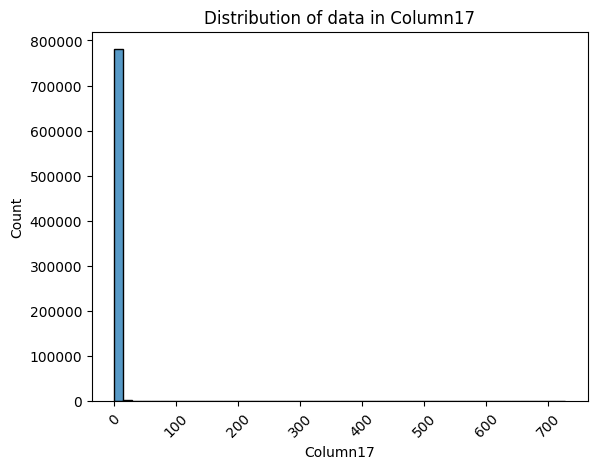

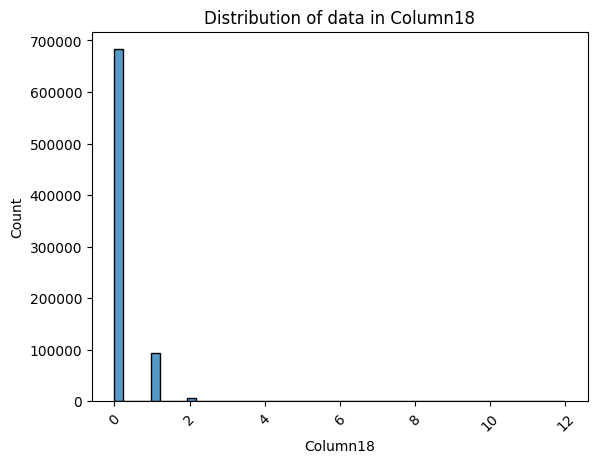

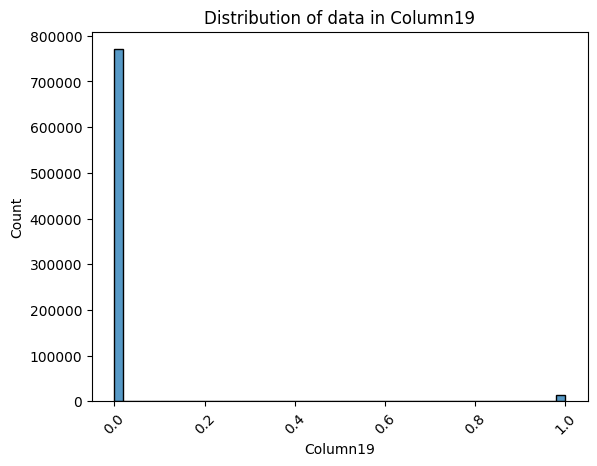

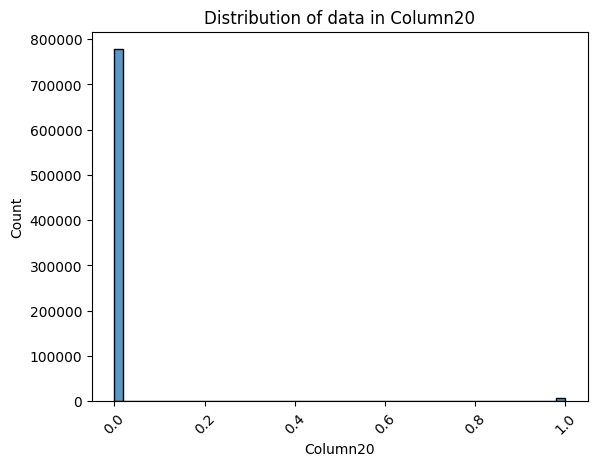

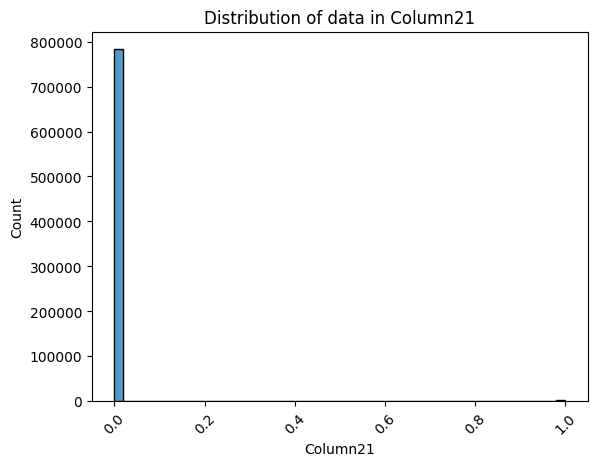

In [12]:
# Visualizations for each column in the training dataset

for col in xtrain.columns:
    ax = sns.histplot(data = xtrain,
                    #  y = xtrain[col],
                     x = xtrain[col], 
                    #  hue = xtrain[col],
                     legend = False,
                     linewidth = 1,
                     edgecolor = 'black',
                     bins = 50)
    ax.set(title = f'Distribution of data in {col}')
    
    plt.xticks(rotation=45)
    plt.show()

- There is a large class imbalance in the target dataset. We will use SMOTE to address this.
- There is also a lot of skew in the training features. We will use robust models to deal with this.

## 🛠️ Data Preprocessing

In [13]:
# Split the training dataset into training and validation sets
# to tune the model while preventing data leakage. 
# Using stratify=ytrain ensures uniform class distribution in both sets.

x_train, x_val, y_train, y_val = train_test_split(xtrain, 
                                                  ytrain, 
                                                  test_size=0.2, 
                                                  stratify = ytrain, 
                                                  random_state=seed) 

In [14]:
# Check class distributions in the training and validation sets
print("Training set class distribution in %:")
print(round(y_train.value_counts(normalize=True), 4)*100)

print("\nValidation set class distributionin %:")
print(round(y_val.value_counts(normalize=True), 4)*100)

Training set class distribution in %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64

Validation set class distributionin %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64


In [15]:
x_val.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
591545,0.0,426,4231.0,0.227021,0.062121,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
592178,0.0,514,2362.0,0.452580,0.062121,-0.007469,-0.407939,-0.015607,0.192057,NaN,...,0,1,0.001351,0.00339,0.0,0,1.0,0,0,0
475414,0.0,1245,2325.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
378155,1.0,2420,23.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015586,-0.774979,NaN,...,1,1,0.001351,0.00339,0.0,0,1.0,0,0,0
54492,0.0,1004,4182.0,0.678139,0.701403,-0.007468,0.315084,-0.015607,0.443411,NaN,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


In [16]:
y_val.head()

,target
591545,0
592178,1
475414,0
378155,0
54492,0


To impute null values, we will use _IterativeImputer_. 

IterativeImputer is a tool in scikit-learn for dealing with missing data in datasets. Instead of simply filling in missing values with averages or constants, it uses a more thoughtful approach.

- **Overview**:
    - **Smart Filling**: IterativeImputer predicts missing values by looking at other features in the dataset. It treats each missing value as a prediction problem, using the available information from other columns.

    - **Iterative Process**: It goes through several rounds of predictions, refining its estimates each time to improve accuracy.

    - **Flexible Options**: Users can choose different methods for making these predictions, allowing for customization based on the dataset.

In [17]:
# Create an IterativeImputer to fill null values, 
# with a missing indicator to identify imputed values.

imputer = IterativeImputer(add_indicator = True, 
                           random_state = seed).set_output(transform = 'pandas')

In [18]:
# Flatten training and validation target arrays for model building
y_train_ravel = np.ravel(y_train)
y_val_ravel = np.ravel(y_val)

In [19]:
# Lists to store model data and metrics.
# Will be convereted to a DataFrame later.
model = []
f1_score_vanilla_model = []
n_neighbors = []

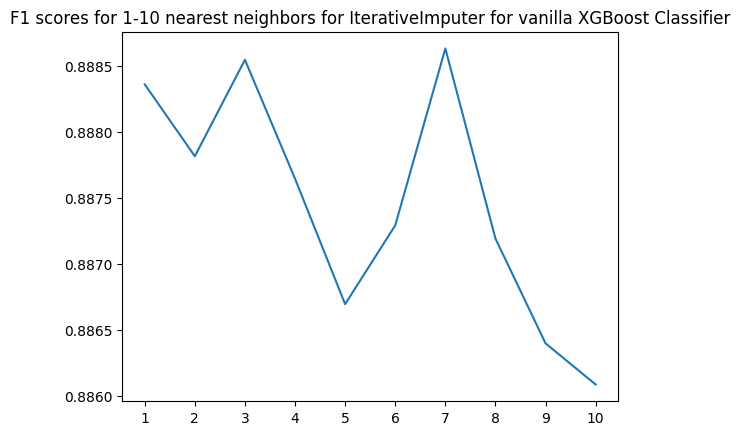

In [20]:
# Lists to store F1 scores and neighbor counts for imputation.
f1_XGB = []
imp_neighbors_XGB = []

# Create a basic XGBoostClassifier to evaluate F1 scores
# for datasets imputed with 1 to 10 neighbors.
model_XGB = XGBClassifier(random_state = seed, n_jobs= - 1)

# Loop through neighbor counts from 1 to 10
for num in np.linspace(1, 10, 10, dtype=int):
    
    # Set the number of nearest neighbors for the imputer
    imputer.set_params(n_nearest_features = num)
    
    # Fit and transform the training data
    # then transform validation data
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)

    # Train the model and make predictions on validation data
    model_XGB.fit(x_train_imp, y_train_ravel)
    model_XGB_pred = model_XGB.predict(x_val_imp)

    # Calculate and store the F1 score
    f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)
    f1_XGB.append(f1_score)
    imp_neighbors_XGB.append(num)

# Sort F1 scores and their corresponding neighbor counts
sorted_scores = sorted(zip(f1_XGB, imp_neighbors_XGB))
sorted_f1_score = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

# Plot F1 scores against neighbor counts
ax = sns.lineplot(x = sorted_neighbors, y = sorted_f1_score)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='F1 scores for 1-10 nearest neighbors for IterativeImputer for vanilla XGBoost Classifier')

# Show the plot
plt.show()

In [21]:
# Store the model name, best F1 score, and corresponding neighbor count
model.append('XGBoost')
f1_score_vanilla_model.append(max(sorted_scores)[0])
n_neighbors.append(max(sorted_scores)[1])

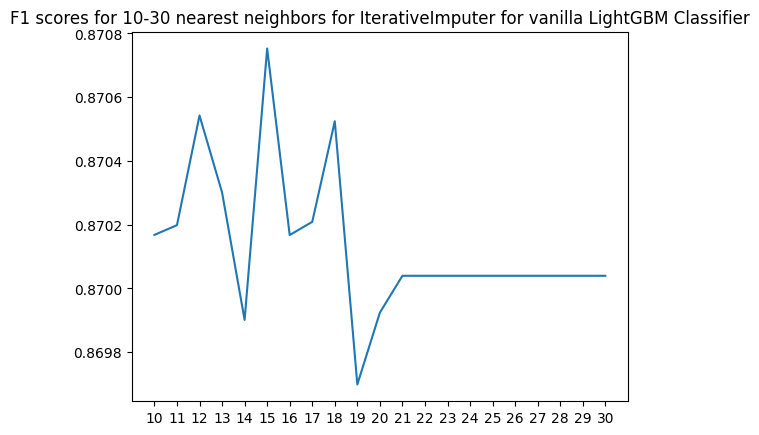

In [22]:
# Lists to store F1 scores and neighbor counts for imputation.
f1_LGBM = []
imp_neighbors_LGBM = []

# Create a basic LGBMClassifier to evaluate F1 scores
# for datasets imputed with 10 to 30 neighbors.
model_LGBM = LGBMClassifier(random_state = seed, 
                            n_jobs= - 1, 
                            class_weight = 'balanced', 
                            verbose = 0)

# Loop through neighbor counts from 10 to 30
for num in range(10, 31):

    # Set the number of nearest neighbors for the imputer
    imputer.set_params(n_nearest_features = num)
    
    # Fit and transform the training data
    # then transform validation data
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)

    # Train the model and make predictions on validation data
    model_LGBM.fit(x_train_imp, y_train_ravel)
    model_LGBM_pred = model_LGBM.predict(x_val_imp)

    # Calculate and store the F1 score
    f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)
    f1_LGBM.append(f1_score)
    imp_neighbors_LGBM.append(num)

# Sort F1 scores and their corresponding neighbor counts
sorted_scores = sorted(zip(f1_LGBM, imp_neighbors_LGBM))
sorted_f1 = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

# Plot F1 scores against neighbor counts
ax = sns.lineplot(x = sorted_neighbors, y = sorted_f1)
ax.set_xticks(range(10, 31))
ax.set(title='F1 scores for 10-30 nearest neighbors for IterativeImputer for vanilla LightGBM Classifier')

# Show the plot
plt.show()

In [23]:
# Store the model name, best F1 score, and corresponding neighbor count
model.append('LightGBM')
n_neighbors.append(max(sorted_scores)[1])
f1_score_vanilla_model.append(max(sorted_scores)[0])

Compiling F1 scores in one DataFrame, we get

In [24]:
# Create a DataFrame from the calculated scores and model details
vanilla_f1_scores = pd.DataFrame({
    'Model': model,
    'n_neighbors': n_neighbors,
    'Score': f1_score_vanilla_model
})

In [25]:
vanilla_f1_scores

,Model,n_neighbors,Score
0,XGBoost,7,0.888631
1,LightGBM,15,0.870753


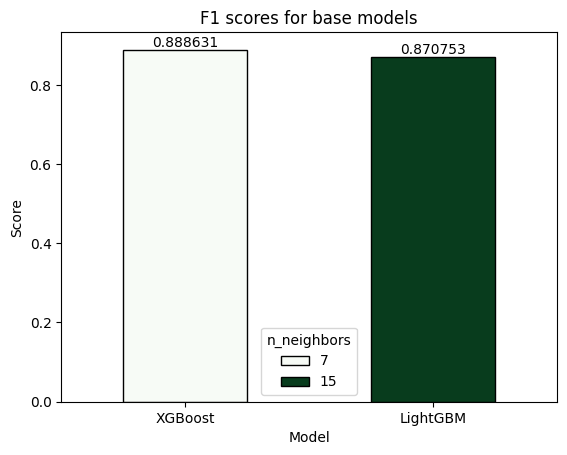

In [26]:
# Create a bar plot of F1 scores for base models, 
# with hue for number of neighbors

ax = sns.barplot(data=vanilla_f1_scores, 
                  x = vanilla_f1_scores['Model'], 
                  y = vanilla_f1_scores['Score'],
                  hue=vanilla_f1_scores['n_neighbors'],
                  edgecolor = 'black',
                  linewidth = 1,
                  palette = 'Greens',
                  width = 0.5)
ax.set(title = 'F1 scores for base models')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Vanilla **XGBoost model** gives us the better F1 score.

## 📏 Performance metrics on validation data

In [27]:
# List of models to evaluate
model_list = ['XGBoost' ,'LightGBM']

# Initialize lists to store metrics for each model
model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [28]:
# Iterate through the list of models to evaluate
for model_name in model_list:
    
    model_list1.append(model_name)

    # Process for XGBoost
    if model_name == 'XGBoost':

        # Set number of neighbors based on the best F1 score
        imputer.set_params(n_nearest_features = vanilla_f1_scores['n_neighbors'][0])
    
        # Impute missing values
        x_train_imp = imputer.fit_transform(x_train)
        x_val_imp = imputer.transform(x_val)

        # Fit model and make predictions
        model_XGB.fit(x_train_imp, y_train_ravel)
        model_XGB_pred = model_XGB.predict(x_val_imp)
    
        # Calculate metrics and store them
        accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_XGB_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_XGB_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_pred)
        balanced_accuracy_list.append(balanced_accuracy)

    # Process for LightGBM
    elif model_name == 'LightGBM':

        # Set number of neighbors based on the best F1 score
        imputer.set_params(n_nearest_features = vanilla_f1_scores['n_neighbors'][1])
    
        # Impute missing values
        x_train_imp = imputer.fit_transform(x_train)
        x_val_imp = imputer.transform(x_val)

        # Fit model and make predictions
        model_LGBM.fit(x_train_imp, y_train_ravel)
        model_LGBM_pred = model_LGBM.predict(x_val_imp)
    
        # Calculate metrics and store them
        accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_LGBM_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_LGBM_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_pred)
        balanced_accuracy_list.append(balanced_accuracy)

In [29]:
# Create a DataFrame to summarize model scores and metrics

model_scores = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [30]:
model_scores

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977857,0.849605,0.929763,0.887878,0.956314,0.798103,0.956314
1,LightGBM,0.972068,0.772872,0.996691,0.870627,0.983098,1.006753,0.983098


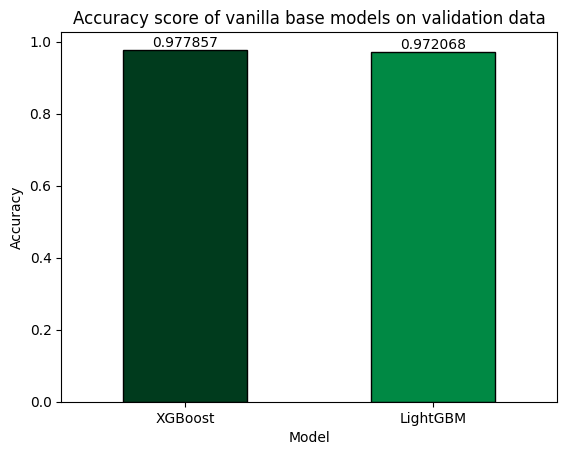

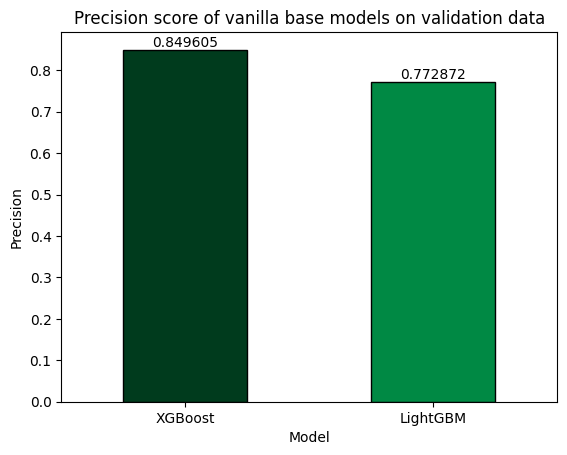

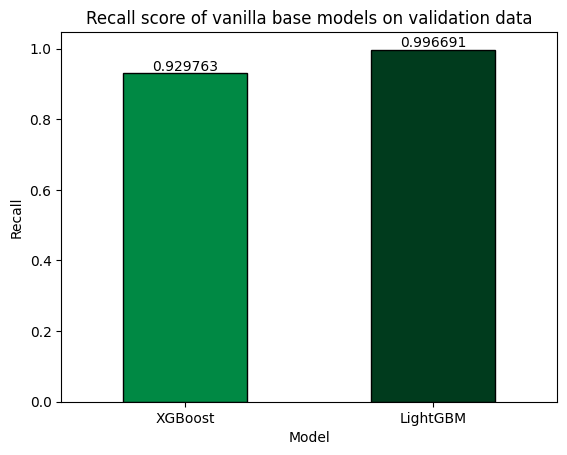

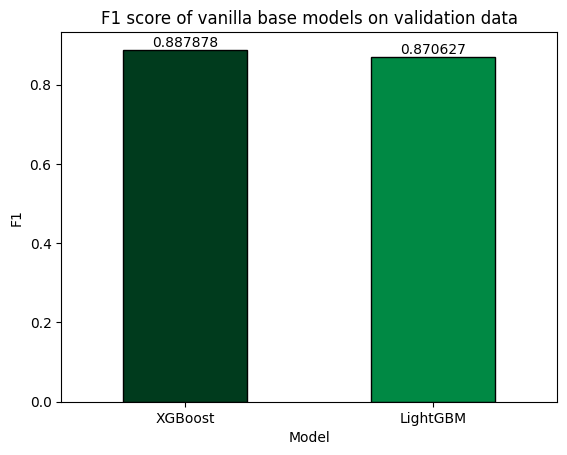

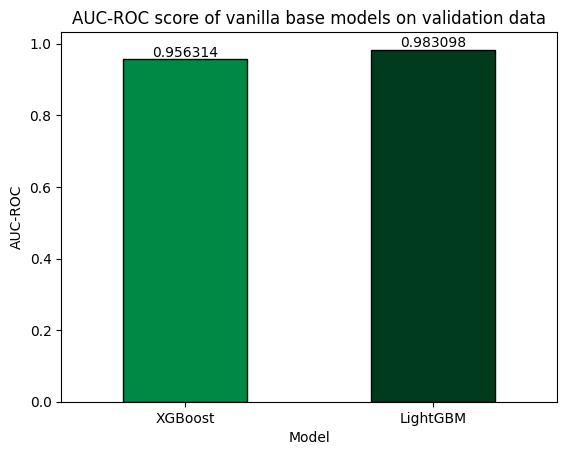

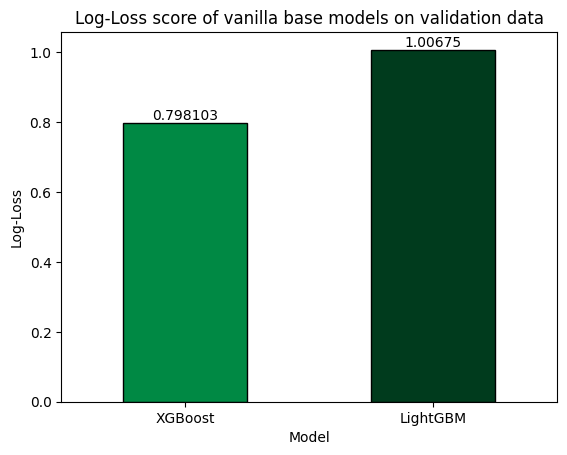

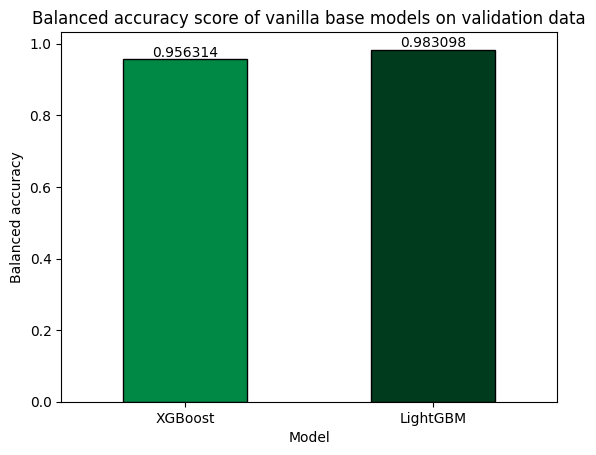

In [31]:
# Generate bar plots for each metric in model_scores
for col in model_scores.columns[1:]:

    ax = sns.barplot(data=model_scores, 
                     x = 'Model', 
                     y = col,
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1,
                     legend = False,
                     palette = 'Greens',
                     width = 0.5)
    
    # Color bars based on maximum value
    for i, bar in enumerate(ax.patches):

        height = bar.get_height()  # Get the bar height (value)
        if height == max(model_scores[col]):
            bar.set_facecolor('#003b1d')  # Dark green for higher values
        else:
            bar.set_facecolor('#008944')  # Light green for lower values

    ax.set_title(f'{col} score of vanilla base models on validation data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

### ROC curve and Confusion Matrices for vanilla XGBoost

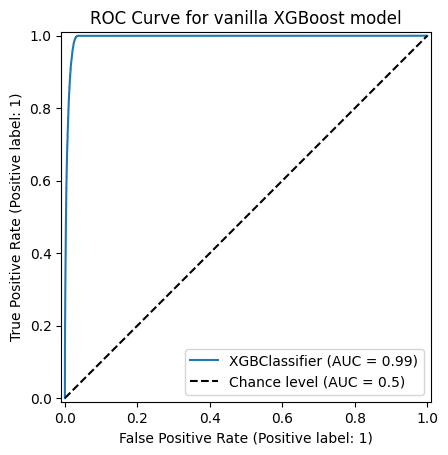

Classification report for vanilla XGBoost: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    142220
           1       0.85      0.93      0.89     14807

    accuracy                           0.98    157027
   macro avg       0.92      0.96      0.94    157027
weighted avg       0.98      0.98      0.98    157027



In [32]:
# Plot the ROC curve for the vanilla XGBoost model
roc_curve_lgbm = metrics.RocCurveDisplay.from_estimator(model_XGB, 
                                                        x_val_imp, 
                                                        y_val_ravel, 
                                                        plot_chance_level=True)
plt.title('ROC Curve for vanilla XGBoost model')
plt.show()

# Generate and print the classification report for the vanilla XGBoost model
classification_report_XGB = metrics.classification_report(y_val_ravel, model_XGB_pred)
print("Classification report for vanilla XGBoost: \n\n", classification_report_XGB)

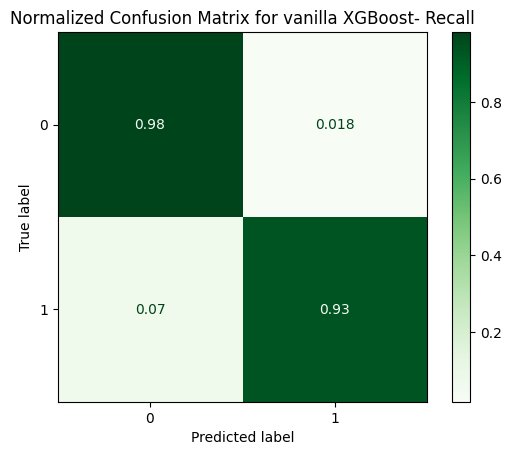

In [33]:
# Plot the normalized confusion matrix for the vanilla XGBoost model,
# normalized by true values
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- Recall')
plt.show()

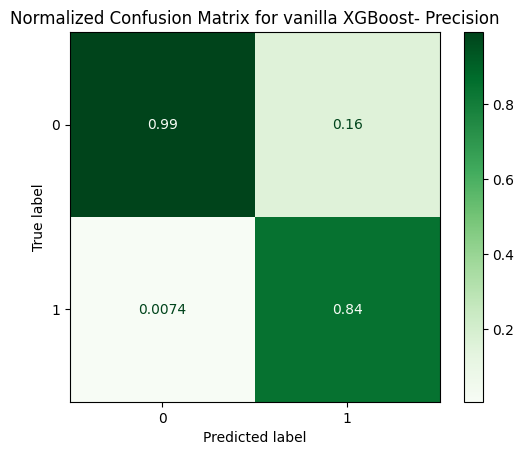

In [34]:
# Plot the normalized confusion matrix for the vanilla XGBoost model, 
# normalized by predicted values
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- Precision')
plt.show()

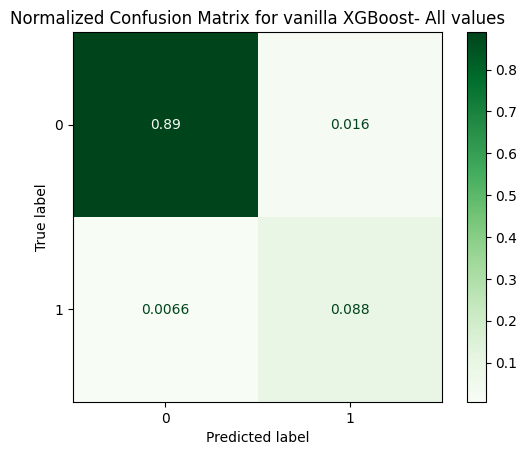

In [35]:
# Plot the normalized confusion matrix for the vanilla XGBoost model, 
# normalized across all values
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_XGB, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla XGBoost- All values')
plt.show()

### ROC curve and Confusion Matrices for vanilla LightGBM

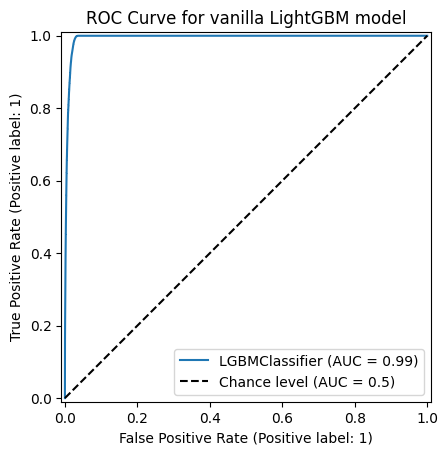

Classification report for vanilla LightGBM:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    142220
           1       0.77      1.00      0.87     14807

    accuracy                           0.97    157027
   macro avg       0.89      0.98      0.93    157027
weighted avg       0.98      0.97      0.97    157027



In [36]:
# Plot the ROC curve for the vanilla LightGBM model
roc_curve_lgbm = metrics.RocCurveDisplay.from_estimator(model_LGBM, 
                                                        x_val_imp, 
                                                        y_val_ravel, 
                                                        plot_chance_level=True)
plt.title('ROC Curve for vanilla LightGBM model')
plt.show()

# Generate and print the classification report for the vanilla LightGBM model
classification_report_LGBM = metrics.classification_report(y_val_ravel, model_LGBM_pred)
print("Classification report for vanilla LightGBM:\n\n", classification_report_LGBM)

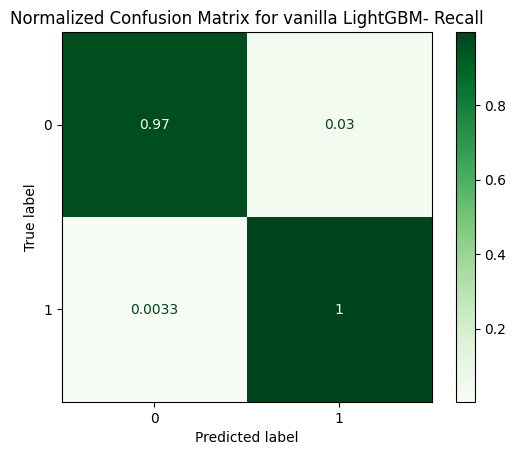

In [37]:
# Plot the normalized confusion matrix for the vanilla LightGBM model,
# normalized by true values
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- Recall')
plt.show()

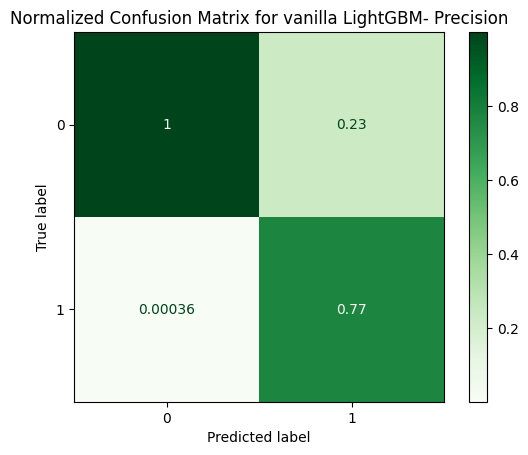

In [38]:
# Plot the normalized confusion matrix for the vanilla LightGBM model,
# normalized by predicted values
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- Precision')
plt.show()

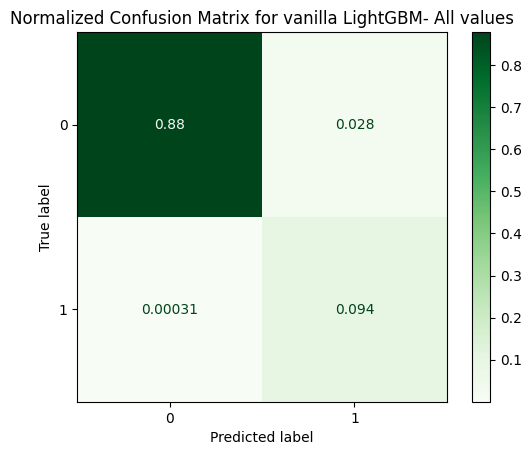

In [39]:
# Plot the normalized confusion matrix for the vanilla LightGBM model,
# normalized across all values
ax = metrics.ConfusionMatrixDisplay.from_estimator(model_LGBM, 
                                                   x_val_imp, 
                                                   y_val_ravel,
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for vanilla LightGBM- All values')
plt.show()

In [40]:
# Empty lists to store the model scores and corresponding neighbors
# while upsampling the minority class.
f1_scores_upsampled = []
n_neighbors_upsampled = []

## 🔢 Scaling input data

In [41]:
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.440757,1.163275,0.000000,0.000000,0.000000,0.000000,18.000000
Column1,785133.0,1321.788614,907.267965,-1080.000000,515.000000,1173.000000,2435.000000,2499.000000
Column2,785133.0,2951.279411,2143.140140,-47.000000,1129.000000,2709.000000,4472.000000,10290.000000
Column3,658830.0,-0.000210,0.999935,-2.028572,-0.675216,0.678139,0.678139,0.678139
Column4,657423.0,-0.000855,1.000350,-1.855728,-0.577162,0.701403,0.701403,0.701403
Column5,617953.0,-0.000367,1.015255,-0.007469,-0.007469,-0.007469,-0.007468,551.421127
Column6,781283.0,-0.000709,0.998984,-0.407939,-0.407939,-0.407939,-0.367723,14.985817
Column7,785133.0,0.000727,1.045883,-0.015607,-0.015607,-0.015607,-0.015607,201.687947
Column8,781283.0,-0.000158,1.056769,-0.774979,-0.774979,0.122085,0.625528,323.992484
Column9,52996.0,0.005245,1.111058,-0.088554,-0.086503,-0.081820,-0.063140,133.911803


In [42]:
# Storing all categorical columns
cat_cols = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']

# Storing all numeric columns
num_cols = [x for x in xtrain.columns if x not in cat_cols]

In [43]:
vanilla_f1_scores

,Model,n_neighbors,Score
0,XGBoost,7,0.888631
1,LightGBM,15,0.870753


In [44]:
# IterativeImputer for XGBoost with best number of neighbors for XGBoost
imputer_xgb = IterativeImputer(n_nearest_features = vanilla_f1_scores['n_neighbors'][0], 
                               add_indicator = True, 
                               random_state = seed).set_output(transform = 'pandas')

# IterativeImputer for LightGBM with best number of neighbors of LGBM
imputer_lgbm = IterativeImputer(n_nearest_features = vanilla_f1_scores['n_neighbors'][1], 
                                add_indicator = True, 
                                random_state = seed).set_output(transform = 'pandas')

In [45]:
# Scaler to scale numeric values
sc = StandardScaler().set_output(transform='pandas')

In [46]:
# Create a column transformer for imputing missing values in XGBoost
impute_xgb = make_column_transformer(
    (imputer_xgb, make_column_selector(dtype_exclude=None)),
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

# Create a column transformer for scaling numeric features in XGBoost
scale_xgb = make_column_transformer(
    (sc, num_cols),
    remainder = 'passthrough',
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

# Combine the imputer and scaler into a 
# preprocessing pipeline for XGBoost
xgb_preprocess_pipeline = make_pipeline(impute_xgb, scale_xgb)

In [47]:
# Create a column transformer for imputing missing values in LightGBM
impute_lgbm = make_column_transformer(
    (imputer_lgbm, make_column_selector(dtype_exclude=None)),
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

# Create a column transformer for scaling numeric features in LightGBM
scale_lgbm = make_column_transformer(
    (sc, num_cols),
    remainder = 'passthrough',
    verbose_feature_names_out = False,
    n_jobs = -1
).set_output(transform = 'pandas')

# Combine the imputer and scaler into a 
# preprocessing pipeline for LightGBM
lgbm_preprocess_pipeline = make_pipeline(impute_lgbm, scale_lgbm)

In [48]:
# List of models to evaluate
model_list = ['XGBoost' ,'LightGBM']

# Initialize lists to store metrics for each model
model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [49]:
# Scale the training data using the preprocessing pipelines
xgb_scaled_train = xgb_preprocess_pipeline.fit_transform(x_train, y_train_ravel)
lgbm_scaled_train = lgbm_preprocess_pipeline.fit_transform(x_train, y_train_ravel)

# Transform the validation data using the same pipelines
xgb_scaled_val = xgb_preprocess_pipeline.transform(x_val)
lgbm_scaled_val = lgbm_preprocess_pipeline.transform(x_val)

# Initialize the XGBoost classifier
model_XGB = XGBClassifier(random_state = seed,
                          n_jobs = -1)

# Initialize the LightGBM classifier with unbalanced handling
model_LGBM = LGBMClassifier(random_state = seed,
                            n_jobs= - 1, 
                            is_unbalance = True,
                            verbose = 0)

# Fit the models on the scaled training data
model_XGB.fit(xgb_scaled_train, y_train_ravel)
model_LGBM.fit(lgbm_scaled_train, y_train_ravel)

# Make predictions on the scaled validation data
model_XGB_pred = model_XGB.predict(xgb_scaled_val)
model_LGBM_pred = model_LGBM.predict(lgbm_scaled_val)

In [50]:
# Iterate through the list of models to evaluate
for model_name in model_list:
    
    model_list1.append(model_name)

    # Process for XGBoost
    if model_name == 'XGBoost':

        # Calculate metrics and store them
        XGB_scaled_accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_pred)
        accuracy_list.append(XGB_scaled_accuracy)

        XGB_scaled_precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
        precision_list.append(XGB_scaled_precision)

        XGB_scaled_recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
        recall_list.append(XGB_scaled_recall)

        XGB_scaled_f1 = metrics.f1_score(y_val_ravel, model_XGB_pred)
        f1_list.append(XGB_scaled_f1)

        XGB_scaled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_XGB_pred)
        auc_roc_list.append(XGB_scaled_roc_auc)

        XGB_scaled_log_loss = metrics.log_loss(y_val_ravel, model_XGB_pred)
        log_loss_list.append(XGB_scaled_log_loss)

        XGB_scaled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_pred)
        balanced_accuracy_list.append(XGB_scaled_balanced_accuracy)

    # Process for LightGBM
    elif model_name == 'LightGBM':

        # Calculate metrics and store them
        LGBM_scaled_accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_pred)
        accuracy_list.append(LGBM_scaled_accuracy)

        LGBM_scaled_precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
        precision_list.append(LGBM_scaled_precision)

        LGBM_scaled_recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
        recall_list.append(LGBM_scaled_recall)

        LGBM_scaled_f1 = metrics.f1_score(y_val_ravel, model_LGBM_pred)
        f1_list.append(LGBM_scaled_f1)

        LGBM_scaled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_LGBM_pred)
        auc_roc_list.append(LGBM_scaled_roc_auc)

        LGBM_scaled_log_loss = metrics.log_loss(y_val_ravel, model_LGBM_pred)
        log_loss_list.append(LGBM_scaled_log_loss)

        LGBM_scaled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_pred)
        balanced_accuracy_list.append(LGBM_scaled_balanced_accuracy)

In [51]:
# Create a DataFrame to summarize model scores and metrics
model_scores_scaled = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [52]:
model_scores

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977857,0.849605,0.929763,0.887878,0.956314,0.798103,0.956314
1,LightGBM,0.972068,0.772872,0.996691,0.870627,0.983098,1.006753,0.983098


In [53]:
model_scores_scaled

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977501,0.847191,0.928953,0.88619,0.955754,0.810958,0.955754
1,LightGBM,0.971992,0.772273,0.996961,0.87035,0.983177,1.009508,0.983177


<h4> Scaling has minimal (and sometimes negative) impact on the model performance. <br> Hence we shall not scale the data in the final pipeline. </h4>

### 🎯 Visualizations for the target variable

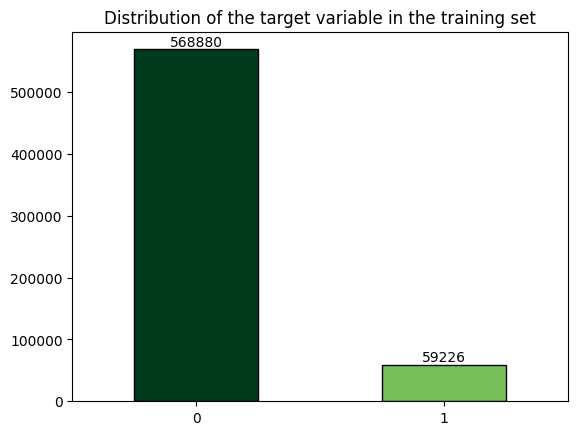

In [54]:
# Create a bar plot showing the distribution of 
# the target variable in the training set
ax = sns.barplot(data = Counter(np.ravel(y_train)),
                 edgecolor = 'black',
                 linewidth = 1,
                 width = 0.5)

# Color bars based on the maximum value
for i, bar in enumerate(ax.patches):

    height = bar.get_height()  # Get the bar height (value)
    if height == max(Counter(np.ravel(y_train)).values()):
        bar.set_facecolor('#003b1d')  # Dark green for higher values
    else:
        bar.set_facecolor('#77c057')  # Light green for lower values

ax.set_title('Distribution of the target variable in the training set')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

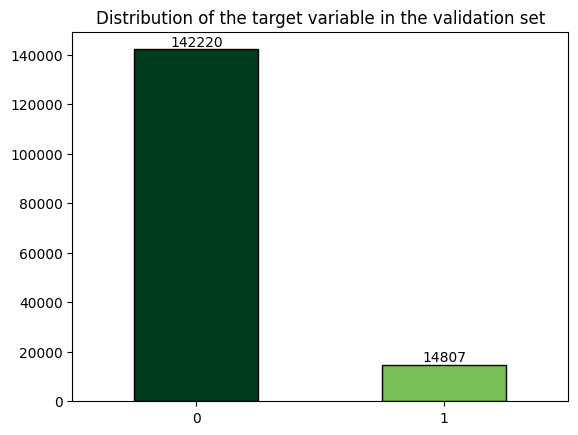

In [55]:
# Create a bar plot showing the distribution of 
# the target variable in the validation set
ax = sns.barplot(data = Counter(y_val_ravel), 
                 edgecolor = 'black', 
                 linewidth = 1,
                 width = 0.5)

# Color bars based on the maximum value
for i, bar in enumerate(ax.patches):

    height = bar.get_height()  # Get the bar height (value)
    if height == max(Counter(np.ravel(y_val_ravel)).values()):
        bar.set_facecolor('#003b1d')  # Dark green for higher values
    else:
        bar.set_facecolor('#77c057')  # Light green for lower values

ax.set_title('Distribution of the target variable in the validation set')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

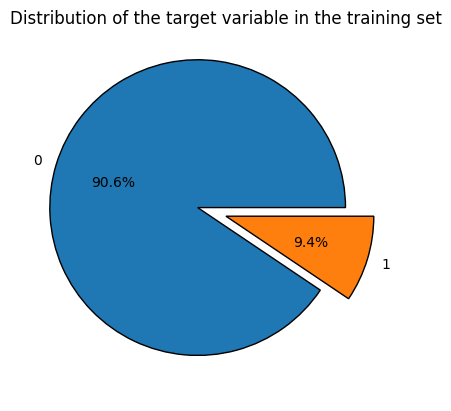

In [56]:
# Pie chart to show the class distribution in training dataset
plt.pie(x = Counter(np.ravel(y_train)).values(), 
        labels = Counter(np.ravel(y_train)).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%',
        wedgeprops = {
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the training set')
plt.show()

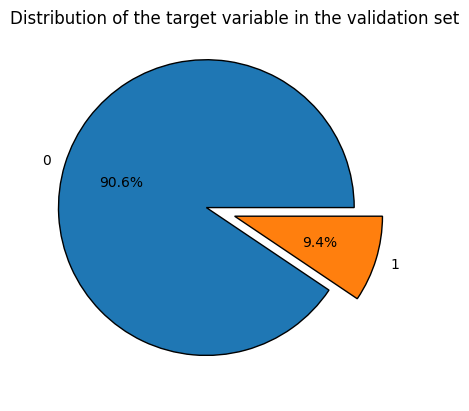

In [57]:
# Pie chart to show the class distribution in validation dataset
plt.pie(x = Counter(y_val_ravel).values(), 
        labels = Counter(y_val_ravel).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%',
        wedgeprops={
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the validation set')
plt.show()

## ⬆️ Upsampling the Minority Class

To address the issue of class imbalance, we will use a technique known as _Synthetic Minority Over-sampling Technique (SMOTE)_.

SMOTE is an upsampling method designed to address class imbalance in datasets.

- **Purpose**: Generate synthetic samples for the minority class to improve classifier performance.
- **How It Works**: It creates new instances by interpolating between existing minority class instances and their nearest neighbors.
- **Benefits**: Reduces overfitting and enhances model robustness compared to random oversampling.
- **Considerations**: The choice of the number of neighbors (k) is important, and excessive noise can occur if the minority class is very small.

In [58]:
# Initialize SMOTE for upsampling the minority class

smote = SMOTE(random_state = seed,
              sampling_strategy='minority')

In [59]:
# Initialize lists to store model names, number of neighbors, 
# and F1 scores after applying SMOTE

model_smote = []
k_neighbors = []
f1_score_smote = []

#### Finding best parameters to upsample for XGBoost

In [60]:
# Initialize lists to store F1 scores and 
# SMOTE neighbor counts for XGBoost
f1_XGB = []
smote_neighbors_XGB = []

# Impute missing values in the training and validation datasets
x_train_imp = imputer_xgb.fit_transform(x_train)
x_val_imp = imputer_xgb.transform(x_val)

# Loop through a range of neighbor counts for SMOTE to find
# the value which gives us the highest F1 score
for num in np.linspace(1, 100, 11, dtype = int):
    
    # Set the number of neighbors for SMOTE
    smote.set_params(k_neighbors = num) 

    # Upsample the training data
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, 
                                                              y_train_ravel)
    
    # Fit the XGBoost model on the upsampled training data 
    # and predict on validation data
    model_XGB.fit(x_train_upsampled, y_train_upsampled)
    model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

    # Calculate the F1 score for the predictions
    XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

    # Store the F1 score and the number of neighbors
    f1_XGB.append(XGB_upsample_f1)
    smote_neighbors_XGB.append(num)

In [61]:
# Find the number of neighbors that yielded the maximum F1 score
max_score_neighbors = max(sorted(list(zip(f1_XGB, smote_neighbors_XGB))))[1]
print('K value for maximum F1 score: ', max_score_neighbors)

K value for maximum F1 score:  1


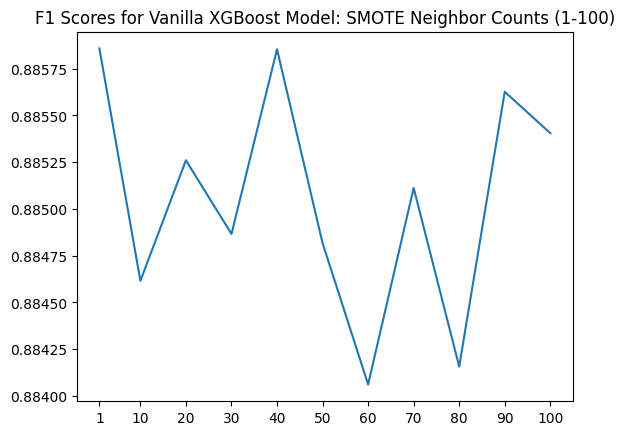

In [62]:
# Plot F1 scores for the vanilla XGBoost model 
# across different SMOTE neighbor counts
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 Scores for Vanilla XGBoost Model: SMOTE Neighbor Counts (1-100)')

plt.show()

Expanding the search space around the maximum score, we get:

In [63]:
# Initialize lists to store F1 scores and 
# SMOTE neighbor counts for XGBoost
f1_XGB = []
smote_neighbors_XGB = []

# If the best number of neighbors is 1, evaluate neighbors from 1 to 10
if max_score_neighbors == 1:

    for num in range(1, 11):
        smote.set_params(k_neighbors = num)
        
        # Upsample the training data
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, 
                                                                  y_train_ravel)

        # Fit the model and make predictions
        model_XGB.fit(x_train_upsampled, y_train_upsampled)
        model_XGB_upsample_pred = model_XGB.predict(x_val_imp)
        
        # Calculate F1 score
        XGB_upsample_f1 = metrics.f1_score(y_val_ravel, 
                                           model_XGB_upsample_pred)

        # Store the results
        f1_XGB.append(XGB_upsample_f1)
        smote_neighbors_XGB.append(num)

# Otherwise, evaluate neighbors around the best score (+-5)
else:

    for num in range(max_score_neighbors - 5, max_score_neighbors + 6):
        smote.set_params(k_neighbors = num)
        
        # Upsample the training data
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, 
                                                                  y_train_ravel)

        # Fit the model and make predictions
        model_XGB.fit(x_train_upsampled, y_train_upsampled)
        model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

        # Calculate F1 score
        XGB_upsample_f1 = metrics.f1_score(y_val_ravel, 
                                           model_XGB_upsample_pred)

        # Store the results
        f1_XGB.append(XGB_upsample_f1)
        smote_neighbors_XGB.append(num)

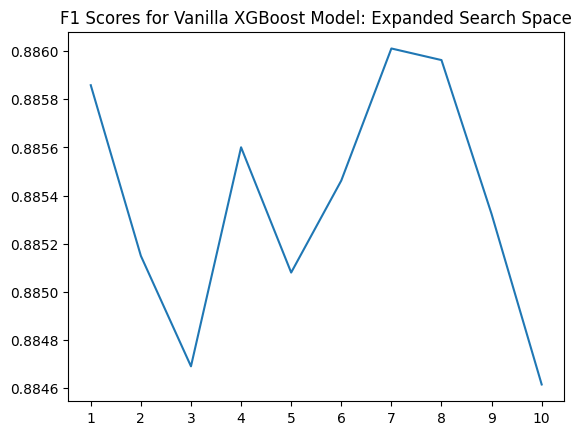

In [64]:
# Plot F1 scores for the vanilla XGBoost model 
# across varying SMOTE neighbor counts
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)

# Set x-ticks based on the range of neighbors evaluated
if max_score_neighbors == 1:
    ax.set_xticks(range(1, 11)) # For neighbors from 1 to 10
else:
    # Set x-ticks around the best score
    ax.set_xticks(range(max_score_neighbors - 5, 
                        max_score_neighbors + 6)) 
ax.set_title('F1 Scores for Vanilla XGBoost Model: Expanded Search Space')

plt.show()

In [65]:
# Find the maximum F1 score along with
# the corresponding number of neighbors

max_score = max(sorted(zip(f1_XGB, smote_neighbors_XGB)))
max_score

(0.8860111809481697, 7)

In [66]:
# Store the model name, optimal number of neighbors, 
# and corresponding F1 score for SMOTE

model_smote.append('XGBoost')
k_neighbors.append(max_score[1]) # Optimal number of neighbors
f1_score_smote.append(max_score[0]) # Maximum F1 score

#### Finding best parameters to upsample for LightGBM

In [67]:
# Initialize lists to store F1 scores 
# and SMOTE neighbor counts for LightGBM
f1_LGBM = []
smote_neighbors_LGBM = []

# Impute missing values in the training and validation datasets
x_train_imp = imputer_lgbm.fit_transform(x_train)
x_val_imp = imputer_lgbm.transform(x_val)

# Loop through a range of neighbor counts for SMOTE to find
# the value which gives us the highest F1 score
for num in np.linspace(1, 100, 11, dtype = int):
    
    # Set the number of neighbors for SMOTE
    smote.set_params(k_neighbors = num) 
    
     # Upsample the training data
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, 
                                                              y_train_ravel)

    # Fit the LightGBM model on the upsampled training data 
    # and predict on validation data
    model_LGBM.fit(x_train_upsampled, y_train_upsampled)
    model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

    # Calculate the F1 score for the predictions
    LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, 
                                        model_LGBM_upsample_pred)

    # Store the F1 score and the number of neighbors
    f1_LGBM.append(LGBM_upsample_f1)
    smote_neighbors_LGBM.append(num)

In [68]:
# Find the number of neighbors that yielded 
# the maximum F1 score for LightGBM
max_score_neighbors = max(sorted(list(zip(f1_LGBM, smote_neighbors_LGBM))))[1]
print('K value for maximum F1 score: ', max_score_neighbors)

K value for maximum F1 score:  1


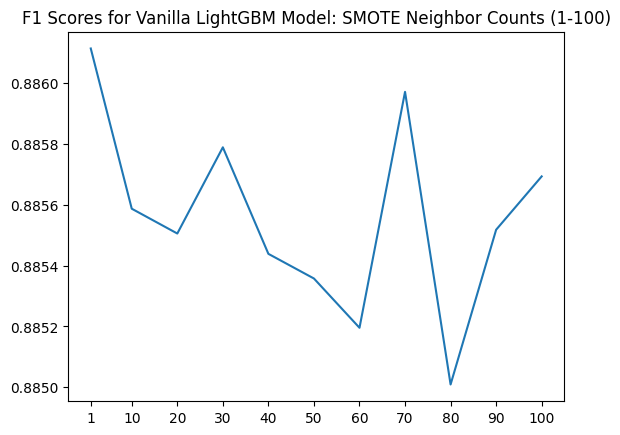

In [69]:
# Plot F1 scores for the vanilla LightGBM model 
# across varying SMOTE neighbor counts

ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int)) # Set x-ticks for neighbor counts
ax.set_title('F1 Scores for Vanilla LightGBM Model: SMOTE Neighbor Counts (1-100)')

plt.show()

Expanding the search space around the max score, we get:

In [70]:
# Initialize lists to store F1 scores 
# and SMOTE neighbor counts for LightGBM
f1_LGBM = []
smote_neighbors_LGBM = []

# If the best number of neighbors is 1, evaluate neighbors from 1 to 10
if max_score_neighbors == 1:
    for num in range(1, 11):

        # Set the number of neighbors for SMOTE
        smote.set_params(k_neighbors = num) 
        
        # Upsample the training data
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, 
                                                                  y_train_ravel)
        
        # Fit the LightGBM model on the upsampled data
        # and predict on validation data
        model_LGBM.fit(x_train_upsampled, y_train_upsampled)
        model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

        # Calculate the F1 score for the predictions
        LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, 
                                            model_LGBM_upsample_pred)

        # Store the F1 score and the number of neighbors
        f1_LGBM.append(LGBM_upsample_f1)
        smote_neighbors_LGBM.append(num)

# Otherwise, evaluate neighbors around the best score (+-5)
else:
    for num in range(max_score_neighbors - 5, max_score_neighbors + 6):

        # Set the number of neighbors for SMOTE
        smote.set_params(k_neighbors = num)
        
        # Upsample the training data
        x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_imp, 
                                                                  y_train_ravel)
        
        # Fit the LightGBM model on the upsampled data
        # and predict on the validation data
        model_LGBM.fit(x_train_upsampled, y_train_upsampled)
        model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

        # Calculate the F1 score for the predictions
        LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, 
                                            model_LGBM_upsample_pred)

        # Store the F1 score and the number of neighbors
        f1_LGBM.append(LGBM_upsample_f1)
        smote_neighbors_LGBM.append(num)

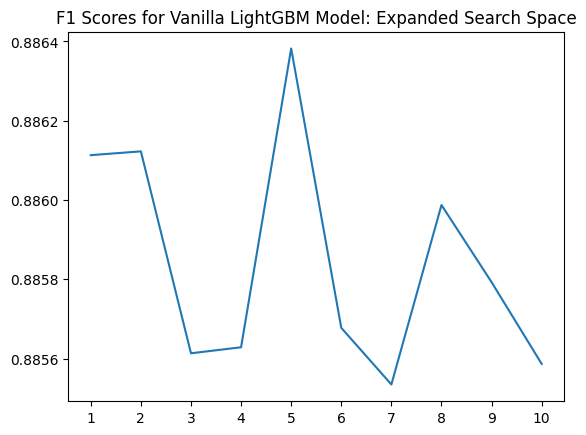

In [71]:
# Plot F1 scores for the LightGBM model across
# varying SMOTE neighbor counts

ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)

# Set x-ticks based on the range of neighbors evaluated
if max_score_neighbors == 1:
    ax.set_xticks(range(1, 11)) # x-ticks for 1 to 10 neighbors
else:
    # Set x-ticks around the best neighbor count
    ax.set_xticks(range(max_score_neighbors - 5, max_score_neighbors + 6))
ax.set_title('F1 Scores for Vanilla LightGBM Model: Expanded Search Space')

plt.show()

In [72]:
# Find the maximum F1 score and 
# the corresponding number of neighbors for LightGBM
max_score = max(sorted(zip(f1_LGBM, smote_neighbors_LGBM)))
max_score

(0.8863821011186801, 5)

#### Visualization of model performance after upsampling

In [73]:
# Append the model name, optimal neighbor count, 
# and F1 score to the respective lists
model_smote.append('LightGBM')
k_neighbors.append(max_score[1]) # Best number of neighbors for SMOTE
f1_score_smote.append(max_score[0]) # Corresponding F1 score

In [74]:
# Create a DataFrame to store the SMOTE model results
smote_f1_scores = pd.DataFrame({
    'Model': model_smote,        # Model names
    'Neighbors': k_neighbors,    # Optimal neighbor counts
    'F1 Score': f1_score_smote   # Corresponding F1 scores
})

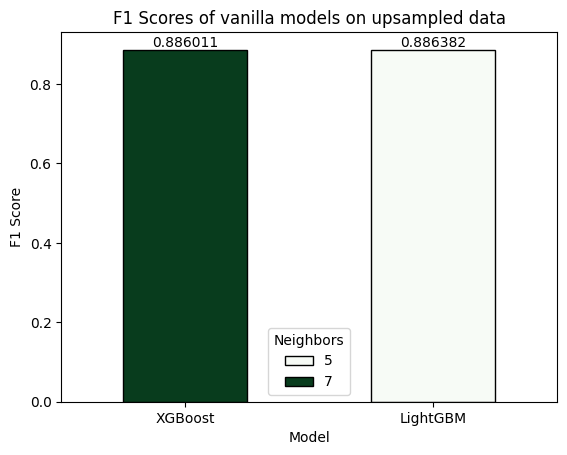

In [75]:
# Create a bar plot for F1 scores of models evaluated on upsampled data
ax = sns.barplot(y = smote_f1_scores['F1 Score'], 
                 x = smote_f1_scores['Model'], 
                 hue = smote_f1_scores['Neighbors'],
                 edgecolor = 'black',
                 linewidth = 1,
                 palette = 'Greens', 
                 width = 0.5)

ax.set_title('F1 Scores of vanilla models on upsampled data')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

We are getting good F1 scores for both base models.

#### Upsampling with the best parameters for each model

In [76]:
# Initialize SMOTE for XGBoost with the optimal number of neighbors
smote_xgb = SMOTE(k_neighbors = smote_f1_scores['Neighbors'][0],
                  sampling_strategy = 'minority',
                  random_state = seed)

# Initialize SMOTE for LightGBM with the optimal number of neighbors
smote_lgbm = SMOTE(k_neighbors = smote_f1_scores['Neighbors'][1],
                  sampling_strategy = 'minority',
                  random_state = seed)

In [77]:
# List of models to evaluate
model_list = ['XGBoost' ,'LightGBM']

# Initialize lists to store performance metrics for each model
model_list1 = []                # Model names
accuracy_list = []              # Accuracy scores
precision_list = []             # Precision scores
recall_list = []                # Recall scores
f1_list = []                    # F1 scores
auc_roc_list = []               # AUC-ROC scores
log_loss_list = []              # Log-loss values
balanced_accuracy_list = []     # Balanced accuracy scores

#### Evaluate performance of vanilla base models after upsampling data

In [78]:
# Iterate through the list of models to evaluate
for model_name in model_list:
    
    model_list1.append(model_name)

    # Process for XGBoost
    if model_name == 'XGBoost':

        # Upsample using SMOTE
        x_train_upsampled_XGB, y_train_upsampled_XGB = smote_xgb.fit_resample(x_train_imp, y_train_ravel)

        # Train the model and predict on validation data
        model_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)
        model_XGB_upsample_pred = model_XGB.predict(x_val_imp)

        # Calculate performance metrics and store them
        XGB_upsampled_accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_upsample_pred)
        accuracy_list.append(XGB_upsampled_accuracy)

        XGB_upsampled_precision = metrics.precision_score(y_val_ravel, model_XGB_upsample_pred)
        precision_list.append(XGB_upsampled_precision)

        XGB_upsampled_recall = metrics.recall_score(y_val_ravel, model_XGB_upsample_pred)
        recall_list.append(XGB_upsampled_recall)

        XGB_upsampled_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)
        f1_list.append(XGB_upsampled_f1)

        XGB_upsampled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_XGB_upsample_pred)
        auc_roc_list.append(XGB_upsampled_roc_auc)

        XGB_upsampled_log_loss = metrics.log_loss(y_val_ravel, model_XGB_upsample_pred)
        log_loss_list.append(XGB_upsampled_log_loss)

        XGB_upsampled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_upsample_pred)
        balanced_accuracy_list.append(XGB_upsampled_balanced_accuracy)


    # Process for LightGBM
    elif model_name == 'LightGBM':

        # Upsample using SMOTE
        x_train_upsampled_LGBM, y_train_upsampled_LGBM = smote_lgbm.fit_resample(x_train_imp, y_train_ravel)
        
        # Train the model and predict on validation data
        model_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
        model_LGBM_upsample_pred = model_LGBM.predict(x_val_imp)

        # Calculate performance metrics and store them
        LGBM_upsampled_accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_upsample_pred)
        accuracy_list.append(LGBM_upsampled_accuracy)

        LGBM_upsampled_precision = metrics.precision_score(y_val_ravel, model_LGBM_upsample_pred)
        precision_list.append(LGBM_upsampled_precision)

        LGBM_upsampled_recall = metrics.recall_score(y_val_ravel, model_LGBM_upsample_pred)
        recall_list.append(LGBM_upsampled_recall)

        LGBM_upsampled_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)
        f1_list.append(LGBM_upsampled_f1)

        LGBM_upsampled_roc_auc = metrics.roc_auc_score(y_val_ravel, model_LGBM_upsample_pred)
        auc_roc_list.append(LGBM_upsampled_roc_auc)

        LGBM_upsampled_log_loss = metrics.log_loss(y_val_ravel, model_LGBM_upsample_pred)
        log_loss_list.append(LGBM_upsampled_log_loss)

        LGBM_upsampled_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_upsample_pred)
        balanced_accuracy_list.append(LGBM_upsampled_balanced_accuracy)

In [79]:
# Creating a DataFrame to store model performance metrics for upsampled data
model_scores_upsampled = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [80]:
model_scores_upsampled

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977010,0.831645,0.948133,0.886077,0.964075,0.828632,0.964075
1,LightGBM,0.976845,0.824833,0.957858,0.886382,0.968340,0.834600,0.968340


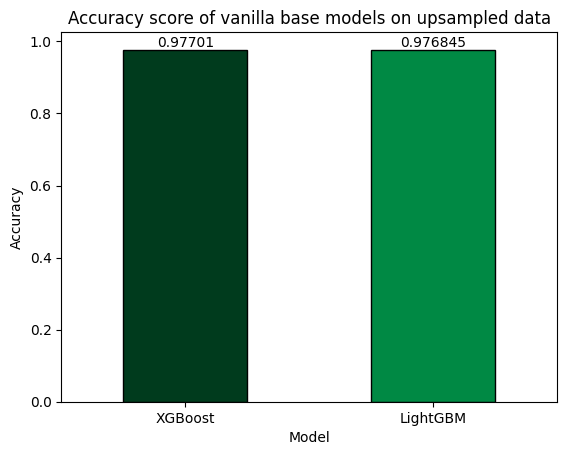

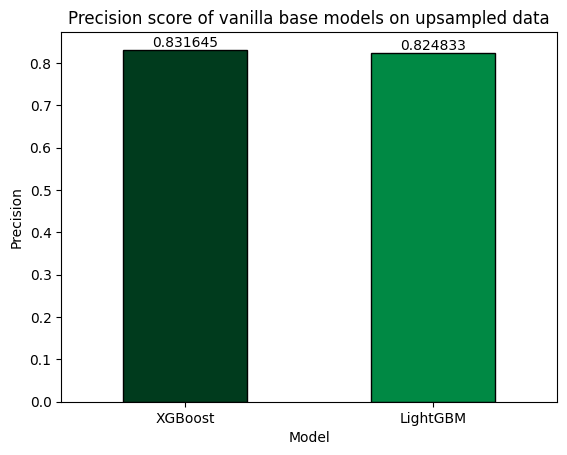

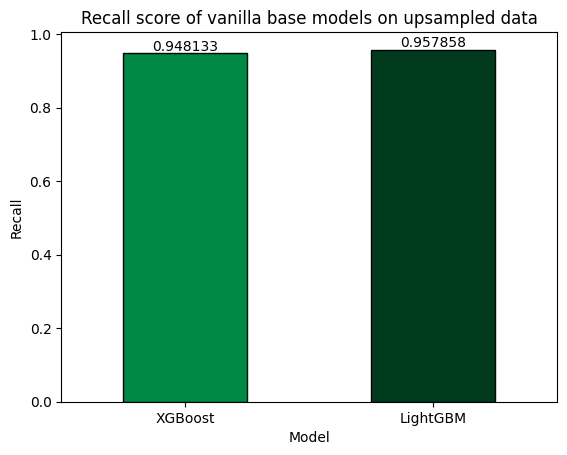

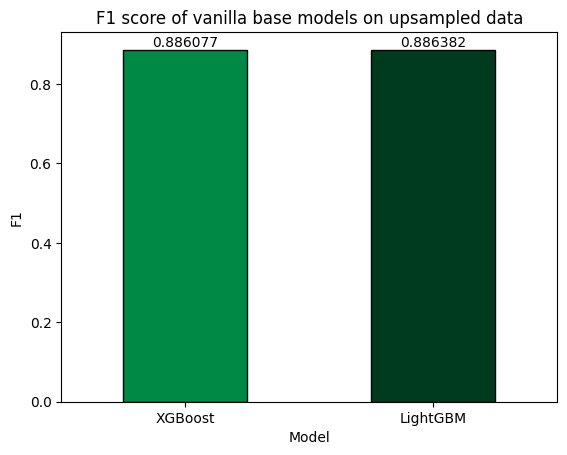

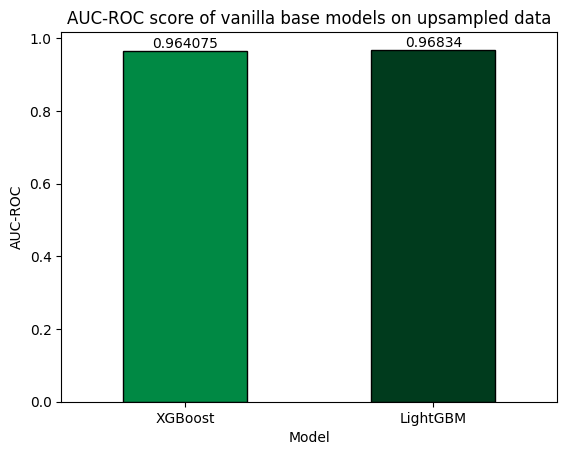

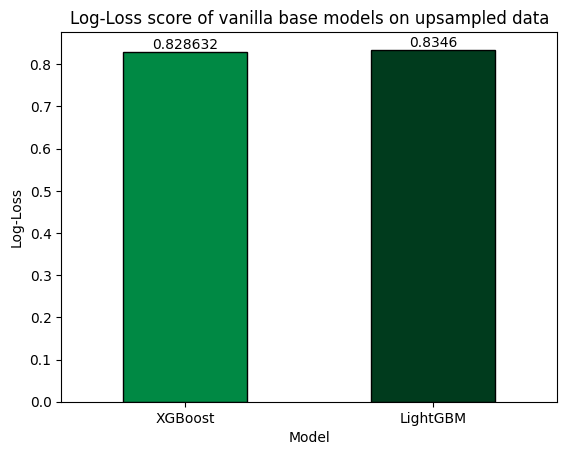

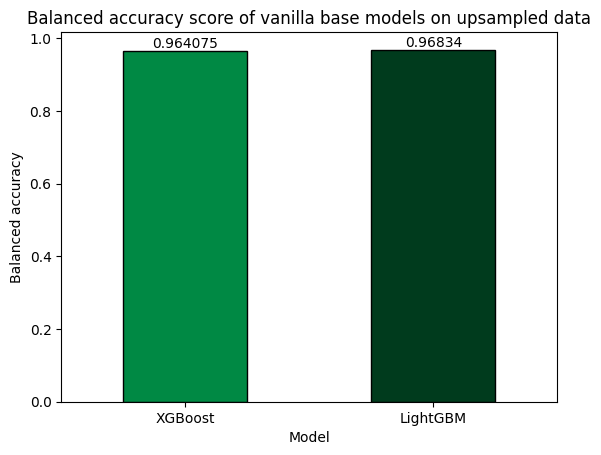

In [81]:
# Generate bar plots for each metric in model_scores_upsampled
for col in model_scores_upsampled.columns[1:]:
    
    ax = sns.barplot(data=model_scores_upsampled, 
                     x = 'Model', 
                     y = col, 
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1,
                     legend = False,
                     palette = 'Greens',
                     width = 0.5)
    
    # Color bars based on maximum value
    for i, bar in enumerate(ax.patches):
        
        height = bar.get_height()  # Get the bar height (value)
        if height == max(model_scores_upsampled[col]):
            bar.set_facecolor('#003b1d')  # Dark green for higher values
        else:
            bar.set_facecolor('#008944')  # Light green for lower values

    ax.set_title(f'{col} score of vanilla base models on upsampled data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    
    plt.show()

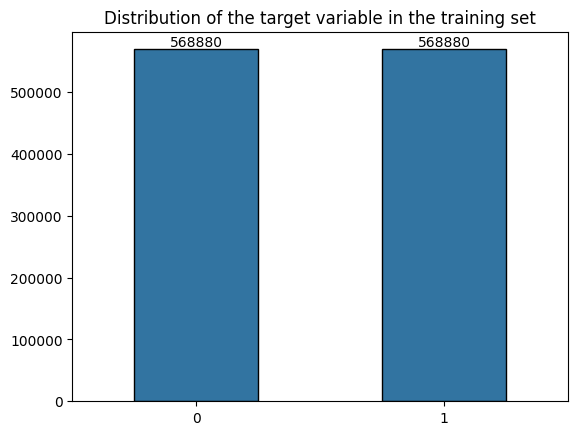

In [82]:
# Bar plot to visualize class distribution after upsampling
ax = sns.barplot(data = Counter(y_train_upsampled),
                 edgecolor = 'black',
                 linewidth = 1,
                 width = 0.5)

ax.set_title('Distribution of the target variable in the training set')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

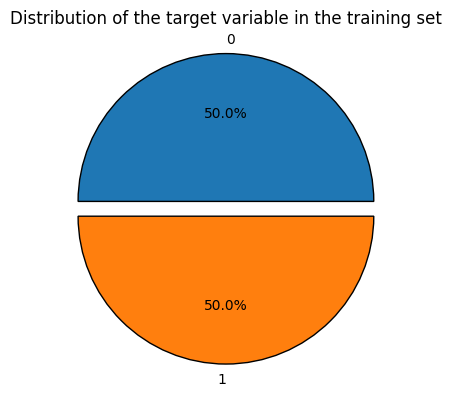

In [83]:
# Pie chart to visualize class distribution after upsampling
plt.pie(x = Counter(y_train_upsampled).values(), 
        labels = Counter(y_train_upsampled).keys(), 
        normalize = True, 
        explode = [0.1, 0],
        autopct='%1.1f%%',
        wedgeprops = {
            'edgecolor': 'black',
            'linewidth': 1
        })
plt.title('Distribution of the target variable in the training set')
plt.show()

## ⚙️ Model Optimization

In [84]:
smote_f1_scores

,Model,Neighbors,F1 Score
0,XGBoost,7,0.886011
1,LightGBM,5,0.886382


In [85]:
model_scores_upsampled

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977010,0.831645,0.948133,0.886077,0.964075,0.828632,0.964075
1,LightGBM,0.976845,0.824833,0.957858,0.886382,0.968340,0.834600,0.968340


### Hyperparameter Optimization

For hyperparameter optimization, we are using the framework [_Optuna_](https://optuna.org/).

Optuna is an open-source hyperparameter optimization framework designed to automate the search for optimal hyperparameters in machine learning models. 

Following are the features of Optuna:

- **Automated Search**: Optuna helps automate the process of finding the best hyperparameters, making it easier and faster than manual tuning.

- **User-Friendly**: With a simple interface, users can easily define which parameters to optimize and their possible values.

- **Smart Optimization**: It uses smart techniques to focus on promising areas of the search space, which saves time and resources.

- **Early Stopping**: If a model isn’t performing well, Optuna can stop its training early, avoiding wasted effort.

- **Visualization**: It provides tools to visualize the optimization process, helping users understand which parameters work best.

For more information, click the attached link to go to the homepage of the framework.

In [86]:
# Create a folder to store model pickle files
os.makedirs('models', exist_ok=True)

#### Tuning hyperparameters for XGBoost

In [87]:
# Objective function for searching over hyperparameter search space
# of XGBoost using Optuna.

def objective(trial):
    
    # Define hyperparameters search space for XGBoost
    params_XGB = {
        # Number of trees
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        # Learning rate
        'eta': trial.suggest_float('eta', 1e-2, 0.3, log=True),
        # Maximum tree depth
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        # Fraction of samples for training
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        # Fraction of features for trees
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1), 
        # Minimum loss reduction       
        'gamma': trial.suggest_float('gamma', 0, 5),
        # L2 regularization term
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        # L1 regularization term
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 5, 20),
    }

    # Create an XGBoost classifier with specified parameters
    optuna_XGB = XGBClassifier(**params_XGB, 
                                random_state = seed, 
                                n_jobs = -1)
    
    # Fit the model to the upsampled training data
    # and predict on validation data
    optuna_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)
    optuna_XGB_pred = optuna_XGB.predict(x_val_imp)

    # Calculate F1 score for the predictions
    score_optuna_XGB_F1 = metrics.f1_score(y_val_ravel, optuna_XGB_pred)

    # Return the F1 score for optimization
    return score_optuna_XGB_F1

In [88]:
# Initialize the TPE sampler with a 
# specified random seed for reproducibility
sampler = optuna.samplers.TPESampler(seed = seed)

# Create an Optuna study to maximize the objective function.
# This will find the best parameters which maximise 
# the chosen performance metric (F1 score).
study = optuna.create_study(direction = 'maximize', 
                            sampler = sampler)

# Optimize the objective function with the specified number of trials
study.optimize(objective,
               n_trials = 50, # Number of trials to run
               n_jobs = -1,   # Use all available CPU cores
               show_progress_bar = True) # Display a progress bar 

  0%|          | 0/50 [00:00<?, ?it/s]

In [89]:
# Display the best F1 score among all the trials
print('F1 score for optimized XGBoost Classifier:', study.best_value)

F1 score for optimized XGBoost Classifier: 0.8882165705461535


In [90]:
# Display the hyperparameters for XGBoost which produced
# the maximum F1 score

print('Parameters for optimized XGBoost Classifier:')
print(study.best_params)

Parameters for optimized XGBoost Classifier:
{'n_estimators': 587, 'eta': 0.04698103098715014, 'max_depth': 9, 'subsample': 0.676444402622411, 'colsample_bytree': 0.5015092634528747, 'gamma': 3.2722158573149454, 'reg_lambda': 1.97510903308894, 'reg_alpha': 0.30832737902158325}


In [91]:
# Create an XGBoost Classifier with the optimized hyperparameters.
tuned_XGB = XGBClassifier(**study.best_params, 
                          random_state = seed, 
                          n_jobs = -1)

# Fit optimized XGBoost to the upsampled data.
tuned_XGB.fit(x_train_upsampled_XGB, y_train_upsampled_XGB)

# Predict on validation data using optimized XGBoost model.
tuned_XGB_pred = tuned_XGB.predict(x_val_imp)

In [92]:
# Save optimized XGBoost model to disk.
joblib.dump(tuned_XGB, 'models/XGBoostClassifier')

['models/XGBoostClassifier']

#### Tuning hyperparameters for LightGBM

In [93]:
# Objective function for searching over hyperparameter search space
# of LightGBM using Optuna.

def objective(trial):
    params_lgbm = {
        # Number of trees
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        # Learning rate
        'learning_rate': trial.suggest_float('learning_rate', 1e-2, 0.3, log = True),
        # Maximum tree depth
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        # Maximum number of leaves
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        # Minimum samples for child nodes
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        # Fraction of samples for training
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        # L2 regularization term
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        # L1 regularization term
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
    }

    # Create a LightGBM classifier with the specified parameters
    optuna_LGBM = LGBMClassifier(**params_lgbm, 
                                 random_state = seed, 
                                 n_jobs = -1, 
                                 verbosity = 0)

    # Fit the model to the upsampled training data and
    # predict on validation data
    optuna_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)
    optuna_LGBM_pred = optuna_LGBM.predict(x_val_imp)

    # Calculate F1 score for the predictions
    score_optuna_LGBM_F1 = metrics.f1_score(y_val_ravel, optuna_LGBM_pred)

    # Return the F1 score for optimization
    return score_optuna_LGBM_F1 

In [94]:
# Initialize the TPE sampler with a 
# specified random seed for reproducibility
sampler = optuna.samplers.TPESampler(seed = seed)

# Create an Optuna study to maximize the objective function.
# This will find the best parameters which maximise 
# the chosen performance metric (F1 score).
study = optuna.create_study(direction = 'maximize', 
                            sampler = sampler)

# Optimize the objective function with the specified number of trials
study.optimize(objective,
               n_trials = 50, # Number of trials to run
               n_jobs = -1,   # Use all available CPU cores
               show_progress_bar = True) # Display a progress bar 

  0%|          | 0/50 [00:00<?, ?it/s]

In [95]:
# Display the best F1 score among all the trials
print('F1 score for optimized LightGBM Classifier:', study.best_value)

F1 score for optimized LightGBM Classifier: 0.8876207479197883


In [96]:
# Display the hyperparameters for LightGBM which produced
# the maximum F1 score
print('Parameters for optimized LightGBM Classifier:')
print(study.best_params)

Parameters for optimized LightGBM Classifier:
{'n_estimators': 739, 'learning_rate': 0.048799134862217264, 'max_depth': 8, 'num_leaves': 106, 'min_child_samples': 27, 'subsample': 0.6110456913169912, 'reg_lambda': 8.222794981198213, 'reg_alpha': 1.7964806837690728}


In [97]:
# Create a LightGBM Classifier with the optimized hyperparameters.
tuned_LGBM = LGBMClassifier(**study.best_params, 
                            random_state = seed, 
                            n_jobs = -1, 
                            verbosity = -1)

# Fit optimized LightGBM to the upsampled data.
tuned_LGBM.fit(x_train_upsampled_LGBM, y_train_upsampled_LGBM)

# Predict on validation data using optimized LightGBM model.
tuned_LGBM_pred = tuned_LGBM.predict(x_val_imp)

In [98]:
# Save optimized LightGBM model to disk.
joblib.dump(tuned_LGBM, 'models/LightGBMClassifier')

['models/LightGBMClassifier']

## 🤝 Building ensemble classifiers

Ensemble Models combine multiple individual models to improve overall performance, leveraging their strengths to enhance accuracy and robustness.

In this case, we will use XGBoost and LightGBM to build ensemble models.

In [99]:
# Create a pipeline for the XGBoost model
base_model_xgb = make_pipeline(
    imputer_xgb,   # Step 1: Impute missing values
    smote_xgb,     # Step 2: Apply SMOTE for balancing the dataset
    tuned_XGB      # Step 3: Use the optimized XGBoost model
)

# Create a pipeline for the LightGBM model
base_model_lgbm = make_pipeline(
    imputer_lgbm,  # Step 1: Impute missing values
    smote_lgbm,    # Step 2: Apply SMOTE for balancing the dataset
    tuned_LGBM     # Step 3: Use the optimized LightGBM model
)

# Define a meta-model using Random Forest for stacking classifier
meta_model = RandomForestClassifier(random_state = seed, 
                                    n_jobs = -1,
                                    oob_score = True)

In [100]:
# List of estimators for ensemble modeling
estimator_list = [
    ('XGBoost', tuned_XGB),
    ('LightGBM', tuned_LGBM)
]

#### Building VotingClassifier

- **Overview**: The VotingClassifier aggregates the predictions from multiple base classifiers to make a final decision. It can use either hard voting (majority class prediction) or soft voting (average predicted probabilities).

- **How It Works**:

    - Hard Voting: Each classifier votes for a class, and the class with the most votes is chosen.
    - Soft Voting: Predicted probabilities from each classifier are averaged, and the class with the highest average probability is selected.
- **Benefits**:

    1. Simple to implement and interpret.
    2. Effective at reducing variance, leading to more stable predictions.

In [101]:
# Create a VotingClassifier with specified estimators
vote_clf = VotingClassifier(estimators = estimator_list, 
                            voting = 'soft',
                            n_jobs = -1)

# Fit the voting classifier to the training data
vote_clf.fit(x_train, y_train_ravel)

# Predict on the validation set using the fitted model
vote_clf_pred = vote_clf.predict(x_val)

In [102]:
# Display the F1 score of voting classifier
metrics.f1_score(y_val_ravel, vote_clf_pred)

0.8900180087471057

In [103]:
# Save VotingClassifier model to disk.
joblib.dump(vote_clf, 'models/VotingClassifier')

['models/VotingClassifier']

#### Building StackingClassifier
- **Overview**: The StackingClassifier combines multiple base classifiers and uses a meta-classifier to make the final prediction. This method often yields better performance than individual models.

- **How It Works**:

    Base classifiers are trained on the same dataset.
    A second-level model (the meta-classifier) is trained using the predictions of the base classifiers as inputs. This model learns to combine their outputs for a final prediction.
- **Benefits**:

    1. Can capture complex relationships between predictions of base classifiers.
    2. More flexible in incorporating different types of models (e.g., decision trees, SVMs).

In [104]:
# Create a StackingClassifier with specified base estimators
# and a final estimator

stack_clf = StackingClassifier(estimators=estimator_list,
                               final_estimator=RandomForestClassifier(random_state = seed, 
                                                                      n_jobs = -1))

# Fit the stacking classifier to the training data
stack_clf.fit(x_train, y_train_ravel)

StackingClassifier(estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5015092634528747,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eta=0.04698103098715014,
                                              eval_metric=None,
                                              feature_types=None,
                                              gamma=3.2722158573149454,
                                              grow_policy=None,
                                              imp...
                                              n_estimators=587, n_jobs=-1,
                                              num_parallel_tree=None, ...)),
                               ('LightGBM',
                                LGBMClassifier(learning_rate=0.048799134862217264,
                                               max_depth=8,
                                               min_child_samples=27,
                                               n_estimators=739, n_jobs=-1,
                                               num_leaves=106, random_state=0,
                                               reg_alpha=1.7964806837690728,
                                               reg_lambda=8.222794981198213,
                                               subsample=0.6110456913169912,
                                               verbosity=-1))],
                   final_estimator=RandomForestClassifier(n_jobs=-1,
                                                          random_state=0))

In [105]:
# Display F1 score of the stacking classifier.
stack_clf_pred = stack_clf.predict(x_val)
print(metrics.f1_score(y_val_ravel, stack_clf_pred))

0.872854480661719


In [106]:
# Save StackingClassifier model to disk.
joblib.dump(stack_clf, 'models/StackingClassifier')

['models/StackingClassifier']

### Evaluating optimized models against validation data

In [107]:
# List of models to evaluate
model_list = ['XGBoost' ,'LightGBM', 'VotingClassifier', 'StackingClassifier']

# Initialize empty lists to store evaluation metrics for each model
model_list1 = []                # To store model names
accuracy_list = []              # To store accuracy scores
precision_list = []             # To store precision scores
recall_list = []                # To store recall scores
f1_list = []                    # To store F1 scores
auc_roc_list = []               # To store AUC-ROC scores
log_loss_list = []              # To store log loss values
balanced_accuracy_list = []     # To store balanced accuracy scores

In [108]:
# Iterate through the list of models to evaluate
for model_name in model_list:
    
    model_list1.append(model_name)

    # Process for XGBoost
    if model_name == 'XGBoost':

        # Make predictions with the optimized XGBoost model
        tuned_XGB_upsample_pred = tuned_XGB.predict(x_val_imp)

        # Calculate and store various metrics for XGBoost
        XGB_tuned_accuracy = metrics.accuracy_score(y_val_ravel, tuned_XGB_upsample_pred)
        accuracy_list.append(XGB_tuned_accuracy)

        XGB_tuned_precision = metrics.precision_score(y_val_ravel, tuned_XGB_upsample_pred)
        precision_list.append(XGB_tuned_precision)

        XGB_tuned_recall = metrics.recall_score(y_val_ravel, tuned_XGB_upsample_pred)
        recall_list.append(XGB_tuned_recall)

        XGB_tuned_f1 = metrics.f1_score(y_val_ravel, tuned_XGB_upsample_pred)
        f1_list.append(XGB_tuned_f1)

        XGB_tuned_roc_auc = metrics.roc_auc_score(y_val_ravel, tuned_XGB_upsample_pred)
        auc_roc_list.append(XGB_tuned_roc_auc)

        XGB_tuned_log_loss = metrics.log_loss(y_val_ravel, tuned_XGB_upsample_pred)
        log_loss_list.append(XGB_tuned_log_loss)

        XGB_tuned_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, tuned_XGB_upsample_pred)
        balanced_accuracy_list.append(XGB_tuned_balanced_accuracy)


    # Process for LightGBM
    elif model_name == 'LightGBM':

        # Make predictions with the optimized LightGBM model
        tuned_LGBM_upsample_pred = tuned_LGBM.predict(x_val_imp)

        # Calculate and store various metrics for LightGBM
        LGBM_tuned_accuracy = metrics.accuracy_score(y_val_ravel, tuned_LGBM_upsample_pred)
        accuracy_list.append(LGBM_tuned_accuracy)

        LGBM_tuned_precision = metrics.precision_score(y_val_ravel, tuned_LGBM_upsample_pred)
        precision_list.append(LGBM_tuned_precision)

        LGBM_tuned_recall = metrics.recall_score(y_val_ravel, tuned_LGBM_upsample_pred)
        recall_list.append(LGBM_tuned_recall)

        LGBM_tuned_f1 = metrics.f1_score(y_val_ravel, tuned_LGBM_upsample_pred)
        f1_list.append(LGBM_tuned_f1)

        LGBM_tuned_roc_auc = metrics.roc_auc_score(y_val_ravel, tuned_LGBM_upsample_pred)
        auc_roc_list.append(LGBM_tuned_roc_auc)

        LGBM_tuned_log_loss = metrics.log_loss(y_val_ravel, tuned_LGBM_upsample_pred)
        log_loss_list.append(LGBM_tuned_log_loss)

        LGBM_tuned_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, tuned_LGBM_upsample_pred)
        balanced_accuracy_list.append(LGBM_tuned_balanced_accuracy)

    
    # Process for VotingClassifier
    elif model_name == 'VotingClassifier':

        # Make predictions with the VotingClassifier model
        vote_clf_pred = vote_clf.predict(x_val)

        # Calculate and store various metrics for VotingClassifier
        vote_clf_accuracy = metrics.accuracy_score(y_val_ravel, vote_clf_pred)
        accuracy_list.append(vote_clf_accuracy)

        vote_clf_precision = metrics.precision_score(y_val_ravel, vote_clf_pred)
        precision_list.append(vote_clf_precision)

        vote_clf_recall = metrics.recall_score(y_val_ravel, vote_clf_pred)
        recall_list.append(vote_clf_recall)

        vote_clf_f1 = metrics.f1_score(y_val_ravel, vote_clf_pred)
        f1_list.append(vote_clf_f1)

        vote_clf_roc_auc = metrics.roc_auc_score(y_val_ravel, vote_clf_pred)
        auc_roc_list.append(vote_clf_roc_auc)

        vote_clf_log_loss = metrics.log_loss(y_val_ravel, vote_clf_pred)
        log_loss_list.append(vote_clf_log_loss)

        vote_clf_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, vote_clf_pred)
        balanced_accuracy_list.append(vote_clf_balanced_accuracy)

    # Process for StackingClassifier
    elif model_name == 'StackingClassifier':

        # Make predictions with the StackingClassifier model
        stack_clf_pred = stack_clf.predict(x_val)

        # Calculate and store various metrics for StackingClassifier
        stack_clf_accuracy = metrics.accuracy_score(y_val_ravel, stack_clf_pred)
        accuracy_list.append(stack_clf_accuracy)

        stack_clf_precision = metrics.precision_score(y_val_ravel, stack_clf_pred)
        precision_list.append(stack_clf_precision)

        stack_clf_recall = metrics.recall_score(y_val_ravel, stack_clf_pred)
        recall_list.append(stack_clf_recall)

        stack_clf_f1 = metrics.f1_score(y_val_ravel, stack_clf_pred)
        f1_list.append(stack_clf_f1)

        stack_clf_roc_auc = metrics.roc_auc_score(y_val_ravel, stack_clf_pred)
        auc_roc_list.append(stack_clf_roc_auc)

        stack_clf_log_loss = metrics.log_loss(y_val_ravel, stack_clf_pred)
        log_loss_list.append(stack_clf_log_loss)

        stack_clf_balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, stack_clf_pred)
        balanced_accuracy_list.append(stack_clf_balanced_accuracy)

In [109]:
# Create a DataFrame to store the evaluation metrics for each model
model_scores_tuned = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [110]:
model_scores_tuned

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.977412,0.832664,0.951712,0.888217,0.965900,0.814171,0.965900
1,LightGBM,0.977552,0.840640,0.940163,0.887621,0.960804,0.809121,0.960804
2,VotingClassifier,0.978220,0.849530,0.934558,0.890018,0.958662,0.785020,0.958662
3,StackingClassifier,0.975234,0.845944,0.901533,0.872854,0.942220,0.892673,0.942220


Stacking classifier performs poorly on all metrics.

##### Visualization of optimized model scores on validation data

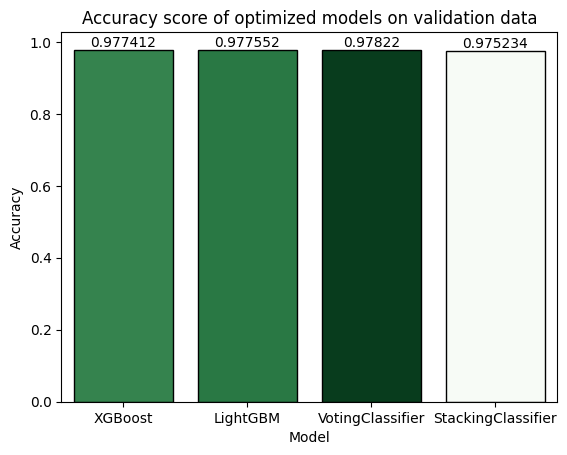

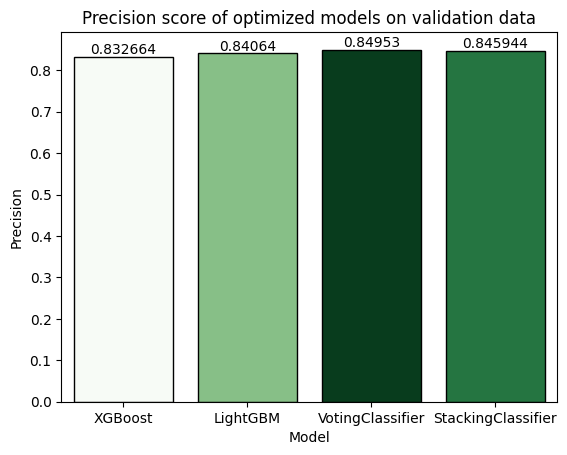

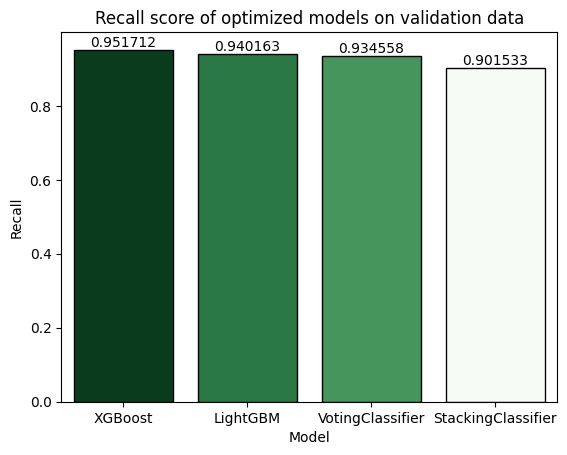

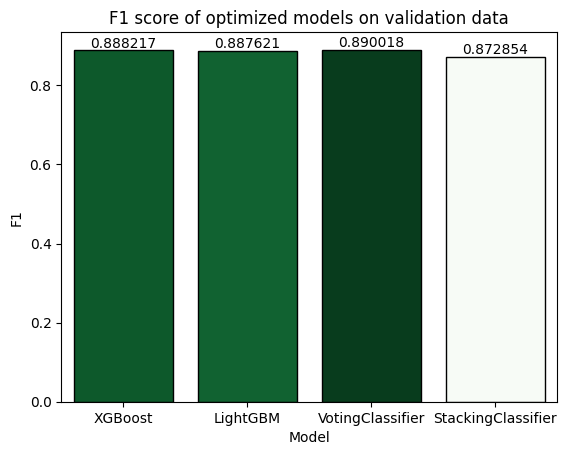

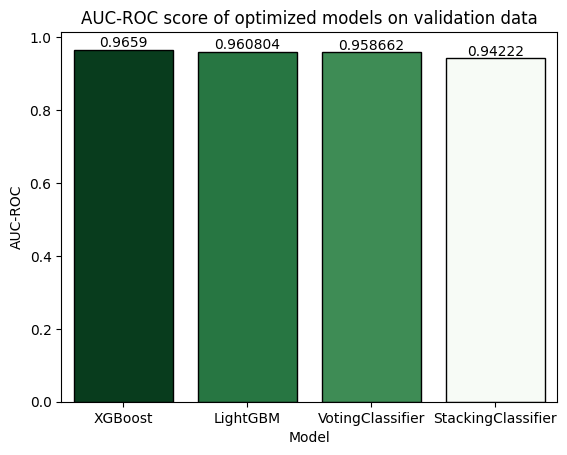

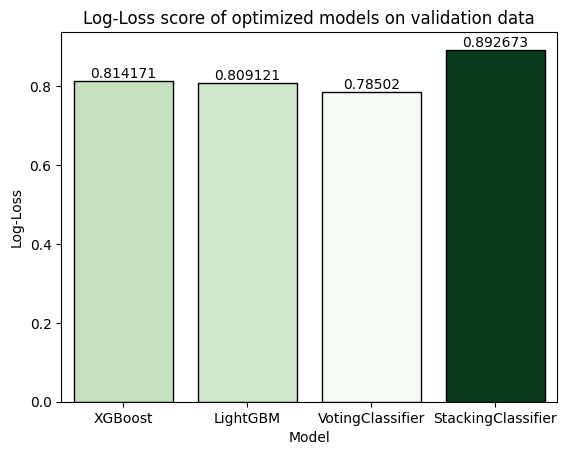

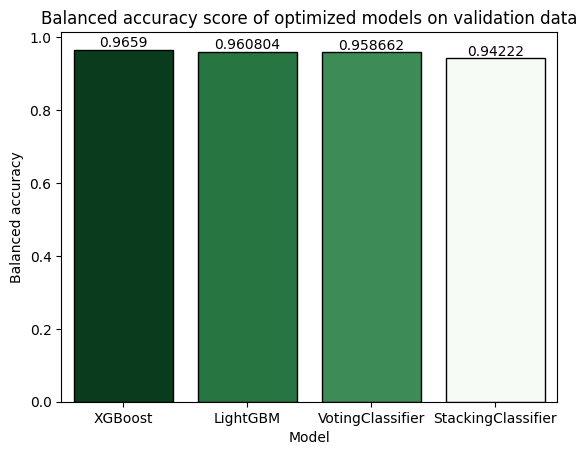

In [111]:
# Bar plots for visualizing scores of 
# all optimized models for each metric.

for col in model_scores_tuned.columns[1:]:

    ax = sns.barplot(data=model_scores_tuned, 
                     x = 'Model', 
                     y = col, 
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1,
                     legend = False,
                     palette='Greens')
    
    ax.set_title(f'{col} score of optimized models on validation data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.bar_label(ax.containers[3])
    
    plt.show()

## 📈 Performance metrics on test data

### Building pipelines to combine all preprocessing steps

In [112]:
# Create a data preprocessing pipeline for XGBoost
xgb_data_preprocess_pipeline = make_pipeline(
    imputer_xgb,        # Step 1: Impute missing values for XGBoost
    tuned_XGB           # Step 2: Use the optimized XGBoost model

)

# Create a data preprocessing pipeline for LightGBM
lgbm_data_preprocess_pipeline = make_pipeline(
    imputer_lgbm,       # Step 1: Impute missing values for LightGBM
    tuned_LGBM          # Step 2: Use the tuned LightGBM model
)

# Create a combined data preprocessing pipeline for both models
data_preprocess_pipeline = make_pipeline(
    xgb_data_preprocess_pipeline,   # Include the XGBoost pipeline
    lgbm_data_preprocess_pipeline   # Include the LightGBM pipeline
)

### Evaluating optimized model performance on test data

In [113]:
# List of models to evaluate
model_list = ['XGBoost' ,'LightGBM', 'VotingClassifier', 'StackingClassifier']

# Empty lists to store evaluation metrics for each model
model_list1 = []             # To store the names of the models
accuracy_list = []           # To store accuracy scores for each model
precision_list = []          # To store precision scores for each model
recall_list = []             # To store recall scores for each model
f1_list = []                 # To store F1 scores for each model
auc_roc_list = []            # To store AUC-ROC scores for each model
log_loss_list = []           # To store log loss values for each model
balanced_accuracy_list = []  # To store balanced accuracy scores for each model

In [114]:
# Iterate over the list of model names to evaluate each model
for model_name in model_list:
    
    # Store the model name for reference
    model_list1.append(model_name)

    # Process for XGBoost
    if model_name == 'XGBoost':

        # Make predictions using the XGBoost data preprocessing pipeline
        XGB_test_pred = xgb_data_preprocess_pipeline.predict(xtest)

        # Calculate and store evaluation metrics for XGBoost
        XGB_test_accuracy = metrics.accuracy_score(np.ravel(ytest), XGB_test_pred)
        accuracy_list.append(XGB_test_accuracy)

        XGB_test_precision = metrics.precision_score(np.ravel(ytest), XGB_test_pred)
        precision_list.append(XGB_test_precision)

        XGB_test_recall = metrics.recall_score(np.ravel(ytest), XGB_test_pred)
        recall_list.append(XGB_test_recall)

        XGB_test_f1 = metrics.f1_score(np.ravel(ytest), XGB_test_pred)
        f1_list.append(XGB_test_f1)

        XGB_test_roc_auc = metrics.roc_auc_score(np.ravel(ytest), xgb_data_preprocess_pipeline.predict_proba(xtest)[:, 1])
        auc_roc_list.append(XGB_test_roc_auc)

        XGB_test_log_loss = metrics.log_loss(np.ravel(ytest), XGB_test_pred)
        log_loss_list.append(XGB_test_log_loss)

        XGB_test_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), XGB_test_pred)
        balanced_accuracy_list.append(XGB_test_balanced_accuracy)

    # Process for LightGBM
    elif model_name == 'LightGBM':

        # Make predictions using the LightGBM data preprocessing pipeline
        LGBM_test_pred = lgbm_data_preprocess_pipeline.predict(xtest)

        # Calculate and store evaluation metrics for LightGBM
        LGBM_tuned_accuracy = metrics.accuracy_score(np.ravel(ytest), LGBM_test_pred)
        accuracy_list.append(LGBM_tuned_accuracy)

        LGBM_tuned_precision = metrics.precision_score(np.ravel(ytest), LGBM_test_pred)
        precision_list.append(LGBM_tuned_precision)

        LGBM_tuned_recall = metrics.recall_score(np.ravel(ytest), LGBM_test_pred)
        recall_list.append(LGBM_tuned_recall)

        LGBM_tuned_f1 = metrics.f1_score(np.ravel(ytest), LGBM_test_pred)
        f1_list.append(LGBM_tuned_f1)

        LGBM_tuned_roc_auc = metrics.roc_auc_score(np.ravel(ytest), lgbm_data_preprocess_pipeline.predict_proba(xtest)[:, 1])
        auc_roc_list.append(LGBM_tuned_roc_auc)

        LGBM_tuned_log_loss = metrics.log_loss(np.ravel(ytest), LGBM_test_pred)
        log_loss_list.append(LGBM_tuned_log_loss)

        LGBM_tuned_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), LGBM_test_pred)
        balanced_accuracy_list.append(LGBM_tuned_balanced_accuracy)

    # Process for VotingClassifier
    elif model_name == 'VotingClassifier':

        # Make predictions using the voting classifier
        vote_clf_pred = vote_clf.predict(xtest)

        # Calculate and store evaluation metrics for VotingClassifier
        vote_clf_accuracy = metrics.accuracy_score(np.ravel(ytest), vote_clf_pred)
        accuracy_list.append(vote_clf_accuracy)

        vote_clf_precision = metrics.precision_score(np.ravel(ytest), vote_clf_pred)
        precision_list.append(vote_clf_precision)

        vote_clf_recall = metrics.recall_score(np.ravel(ytest), vote_clf_pred)
        recall_list.append(vote_clf_recall)

        vote_clf_f1 = metrics.f1_score(np.ravel(ytest), vote_clf_pred)
        f1_list.append(vote_clf_f1)

        vote_clf_roc_auc = metrics.roc_auc_score(np.ravel(ytest), vote_clf.predict_proba(xtest)[:, 1])
        auc_roc_list.append(vote_clf_roc_auc)

        vote_clf_log_loss = metrics.log_loss(np.ravel(ytest), vote_clf_pred)
        log_loss_list.append(vote_clf_log_loss)

        vote_clf_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), vote_clf_pred)
        balanced_accuracy_list.append(vote_clf_balanced_accuracy)

    # Process for StackingClassifier
    elif model_name == 'StackingClassifier':

        # Make predictions using the stacking classifier
        stack_clf_pred = stack_clf.predict(xtest)

        # Calculate and store evaluation metrics for StackingClassifier
        stack_clf_accuracy = metrics.accuracy_score(np.ravel(ytest), stack_clf_pred)
        accuracy_list.append(stack_clf_accuracy)

        stack_clf_precision = metrics.precision_score(np.ravel(ytest), stack_clf_pred)
        precision_list.append(stack_clf_precision)

        stack_clf_recall = metrics.recall_score(np.ravel(ytest), stack_clf_pred)
        recall_list.append(stack_clf_recall)

        stack_clf_f1 = metrics.f1_score(np.ravel(ytest), stack_clf_pred)
        f1_list.append(stack_clf_f1)

        stack_clf_roc_auc = metrics.roc_auc_score(np.ravel(ytest), stack_clf.predict_proba(xtest)[:, 1])
        auc_roc_list.append(stack_clf_roc_auc)

        stack_clf_log_loss = metrics.log_loss(np.ravel(ytest), stack_clf_pred)
        log_loss_list.append(stack_clf_log_loss)

        stack_clf_balanced_accuracy = metrics.balanced_accuracy_score(np.ravel(ytest), stack_clf_pred)
        balanced_accuracy_list.append(stack_clf_balanced_accuracy)

In [115]:
# Create a DataFrame to store the evaluation metrics for each model
model_scores_test = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list,
    'AUC-ROC': auc_roc_list,
    'Log-Loss': log_loss_list,
    'Balanced accuracy': balanced_accuracy_list
})

In [116]:
model_scores_test

,Model,Accuracy,Precision,Recall,F1,AUC-ROC,Log-Loss,Balanced accuracy
0,XGBoost,0.976019,0.851425,0.903315,0.876602,0.993915,0.864347,0.943452
1,LightGBM,0.977907,0.839783,0.946227,0.889833,0.994690,0.796312,0.963716
2,VotingClassifier,0.978587,0.849751,0.938933,0.892119,0.994986,0.771797,0.960825
3,StackingClassifier,0.975828,0.846814,0.907894,0.876291,0.993137,0.871233,0.945397


### Visualization of optimized model performance on test data

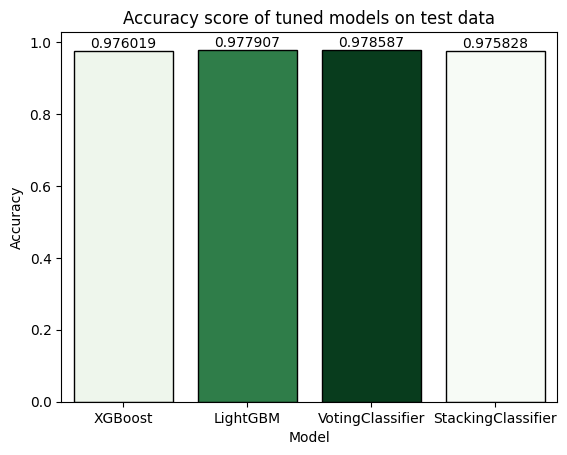

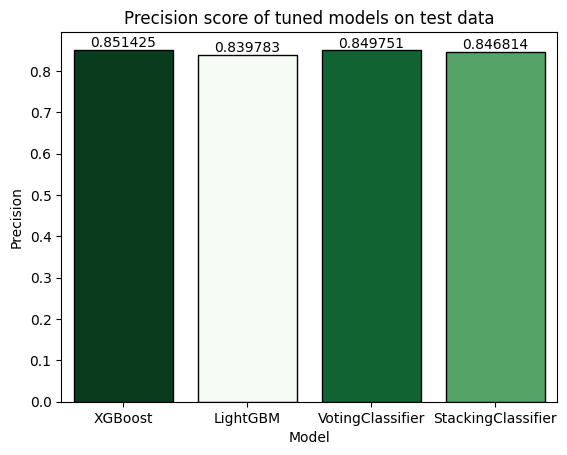

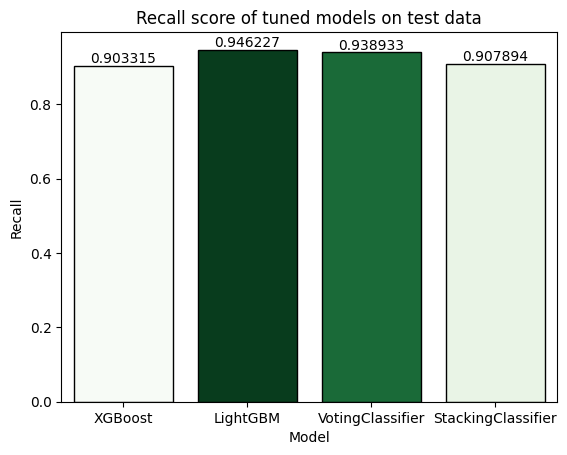

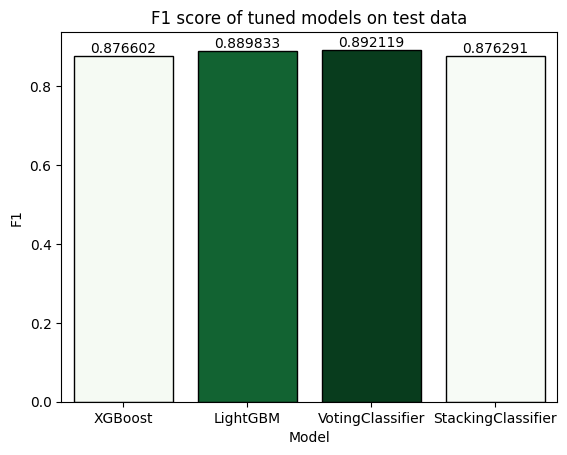

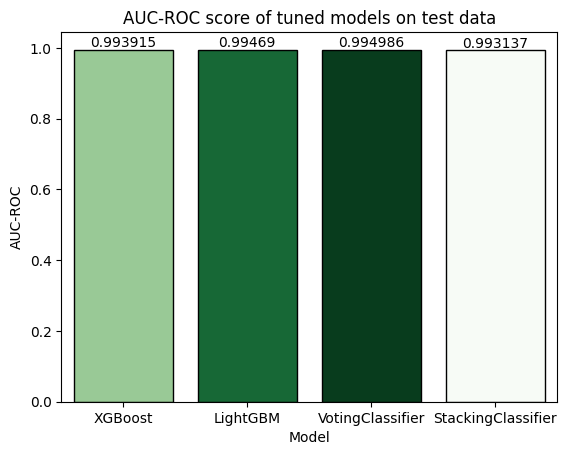

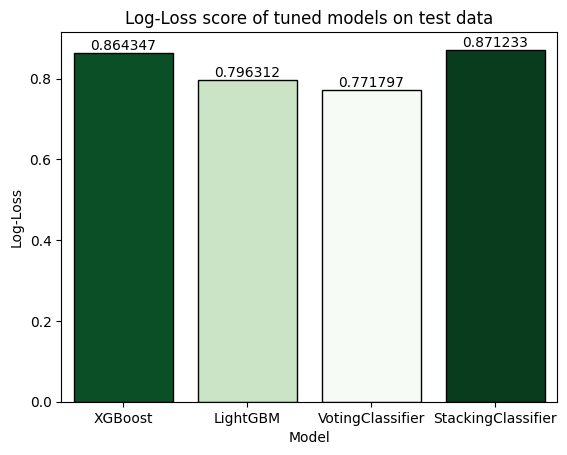

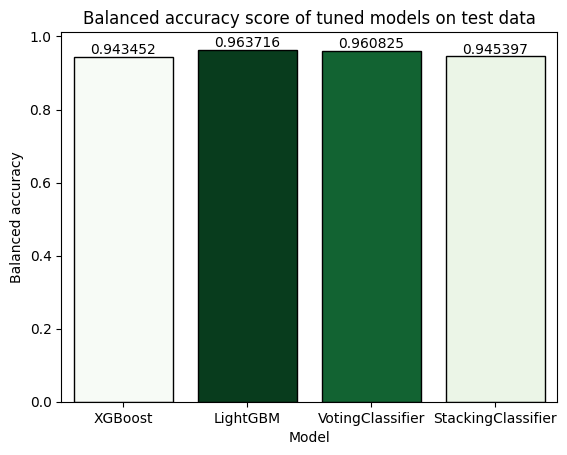

In [117]:
# Bar plot to visualize the performance of each model for 
# all performance metrics.

for col in model_scores_test.columns[1:]:

    ax = sns.barplot(data=model_scores_test, 
                     x = 'Model', 
                     y = col, 
                     hue = col,
                     edgecolor = 'black',
                     linewidth = 1, 
                     legend = False,
                     palette='Greens')
    
    ax.set_title(f'{col} score of tuned models on test data')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    ax.bar_label(ax.containers[3])
    
    plt.show()

### ROC curve and Confusion Matrices for optimized XGBoost

Classification report for optimized XGBoost on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.90      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.94      0.93    261712
weighted avg       0.98      0.98      0.98    261712



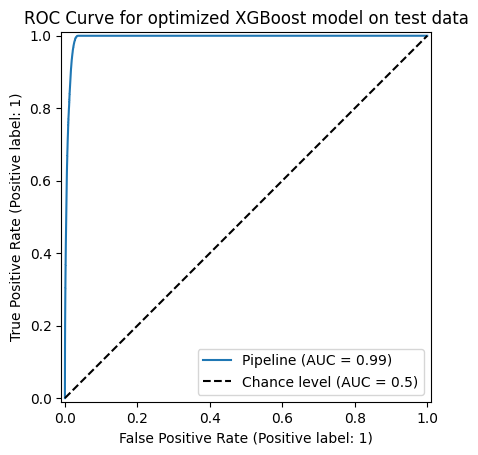

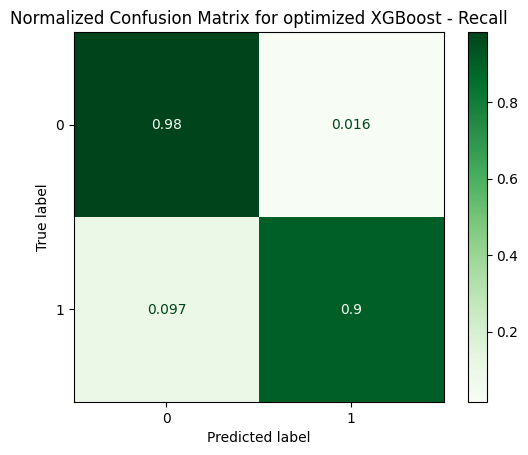

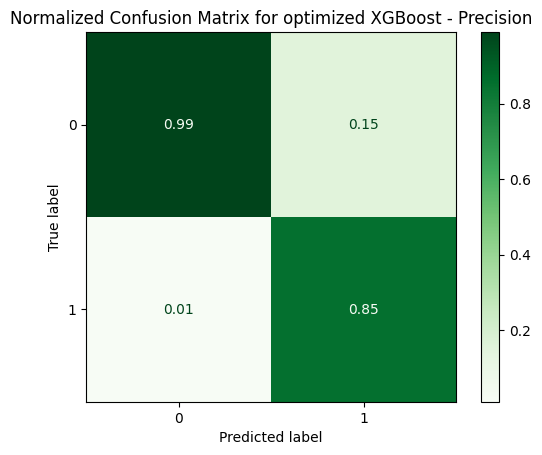

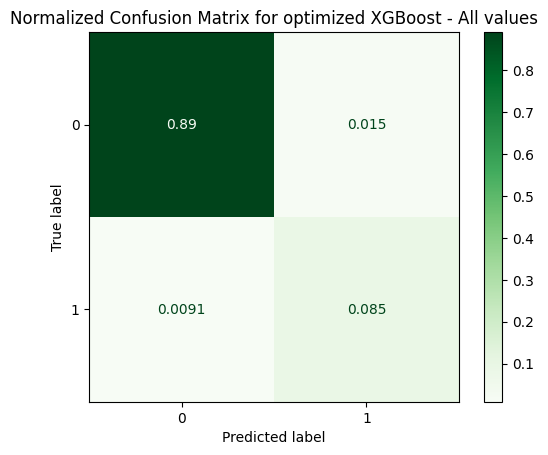

In [118]:
# Generate and print the classification report 
# for the optimized XGBoost model on test data
classification_report_XGB = metrics.classification_report(np.ravel(ytest), xgb_data_preprocess_pipeline.predict(xtest))
print("Classification report for optimized XGBoost on test data: \n\n", classification_report_XGB)

# Plot the ROC curve for the optimized XGBoost model
roc_curve_test_XGB = metrics.RocCurveDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                        xtest, 
                                                        np.ravel(ytest), 
                                                        plot_chance_level=True)
plt.title('ROC Curve for optimized XGBoost model on test data')
plt.show()

# Display the normalized confusion matrix for recall
ax = metrics.ConfusionMatrixDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized XGBoost - Recall')
plt.show()

# Display the normalized confusion matrix for precision
ax = metrics.ConfusionMatrixDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized XGBoost - Precision')
plt.show()

# Display the normalized confusion matrix for all values
ax = metrics.ConfusionMatrixDisplay.from_estimator(xgb_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized XGBoost - All values')
plt.show()

### ROC curve and Confusion Matrices for optimized LightGBM

Classification report for optimized LightGBM on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.95      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



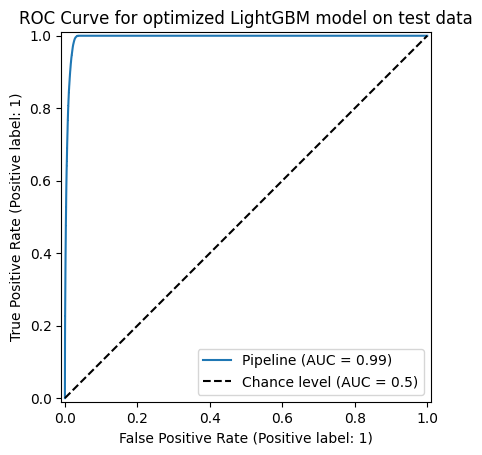

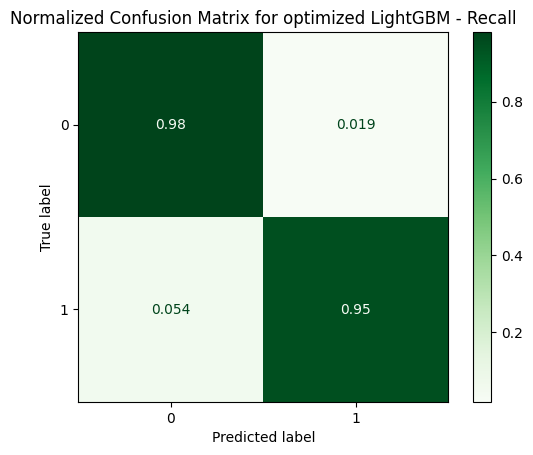

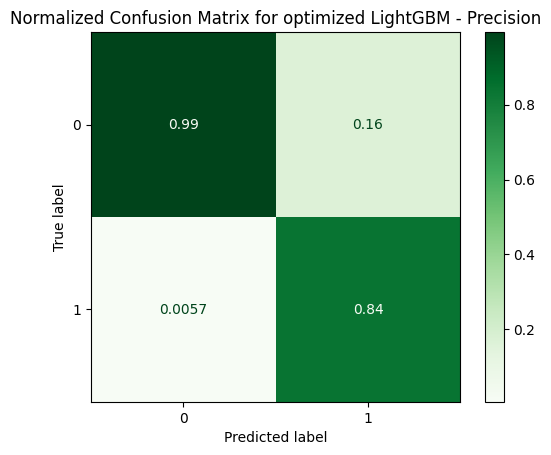

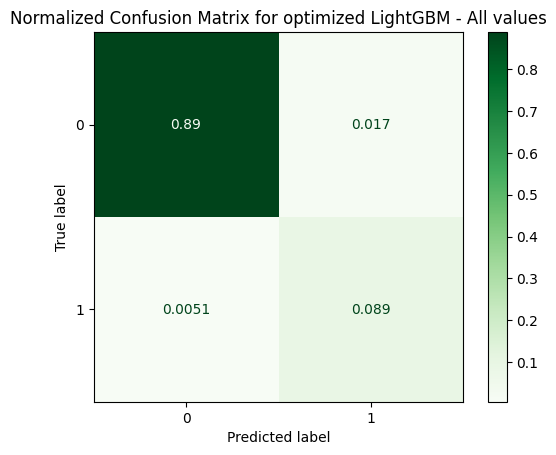

In [119]:
# Generate and print the classification report 
# for the optimized LightGBM model on test data

classification_report_LGBM = metrics.classification_report(np.ravel(ytest), lgbm_data_preprocess_pipeline.predict(xtest))
print("Classification report for optimized LightGBM on test data: \n\n", classification_report_LGBM)

# Plot the ROC curve for the optimized LightGBM model
roc_curve_test_LGBM = metrics.RocCurveDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                        xtest, 
                                                        np.ravel(ytest), 
                                                        plot_chance_level=True)
plt.title('ROC Curve for optimized LightGBM model on test data')
plt.show()

# Display the normalized confusion matrix for recall
ax = metrics.ConfusionMatrixDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized LightGBM - Recall')
plt.show()

# Display the normalized confusion matrix for precision
ax = metrics.ConfusionMatrixDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized LightGBM - Precision')
plt.show()

# Display the normalized confusion matrix for all values
ax = metrics.ConfusionMatrixDisplay.from_estimator(lgbm_data_preprocess_pipeline, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for optimized LightGBM - All values')
plt.show()

### ROC curve and Confusion Matrices for Voting Classifier

Classification report for Voting Classifier on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



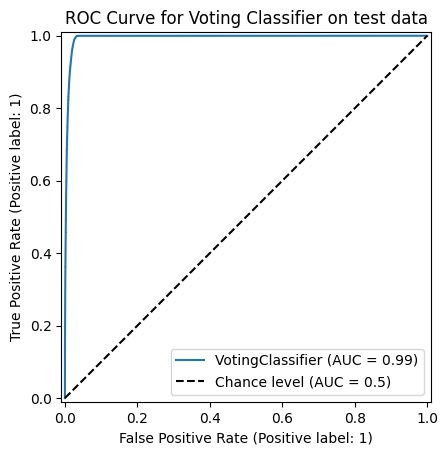

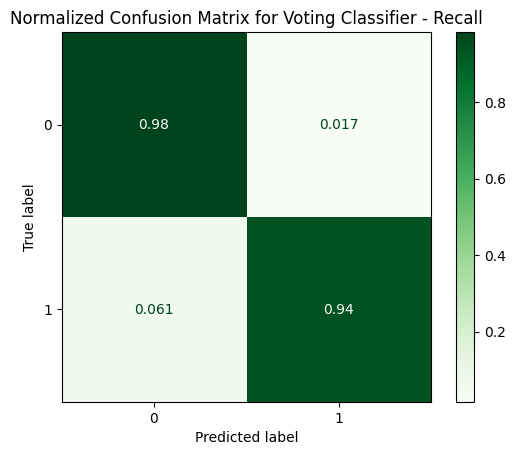

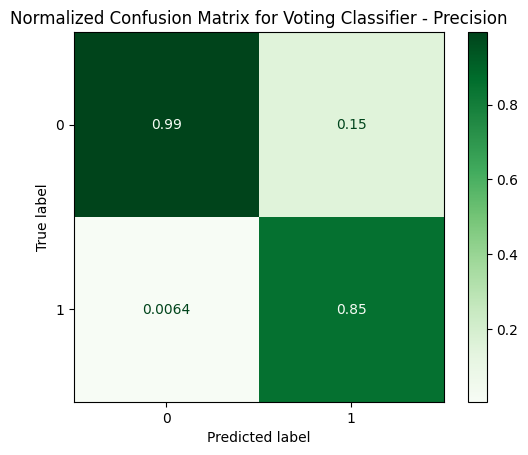

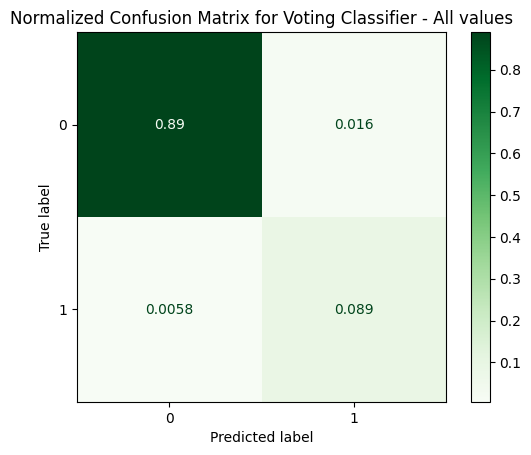

In [120]:
# Generate and print the classification report 
# for the VotingClassifier model on test data
classification_report_vote_clf = metrics.classification_report(np.ravel(ytest), 
                                                               vote_clf.predict(xtest))

print("Classification report for Voting Classifier on test data: \n\n", classification_report_vote_clf)

# Plot the ROC curve for the VotingClassifier model
roc_curve_test_vote_clf = metrics.RocCurveDisplay.from_estimator(vote_clf, 
                                                                 xtest, 
                                                                 np.ravel(ytest), 
                                                                 plot_chance_level=True)
plt.title('ROC Curve for Voting Classifier on test data')
plt.show()

# Display the normalized confusion matrix for recall
ax = metrics.ConfusionMatrixDisplay.from_estimator(vote_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Voting Classifier - Recall')
plt.show()

# Display the normalized confusion matrix for precision
ax = metrics.ConfusionMatrixDisplay.from_estimator(vote_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Voting Classifier - Precision')
plt.show()

# Display the normalized confusion matrix for all values
ax = metrics.ConfusionMatrixDisplay.from_estimator(vote_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Voting Classifier - All values')
plt.show()

Classification report for Stacking Classifier on test data: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.91      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



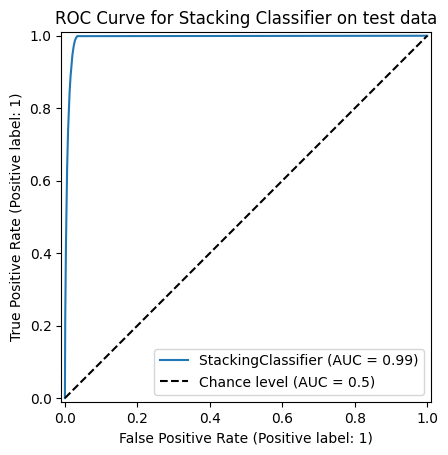

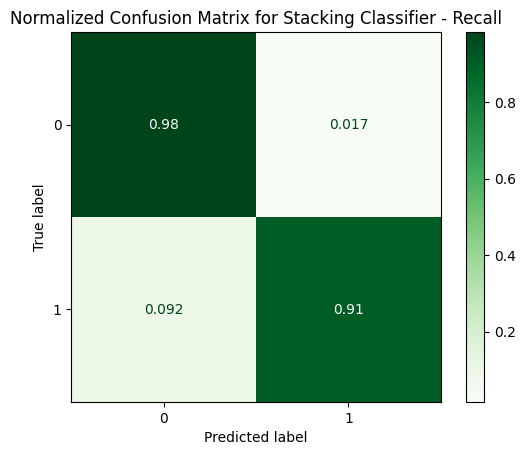

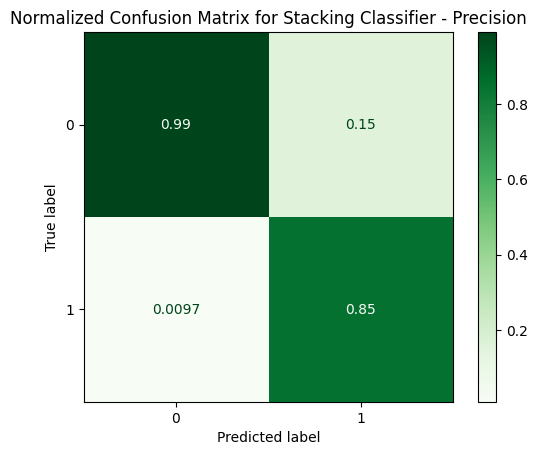

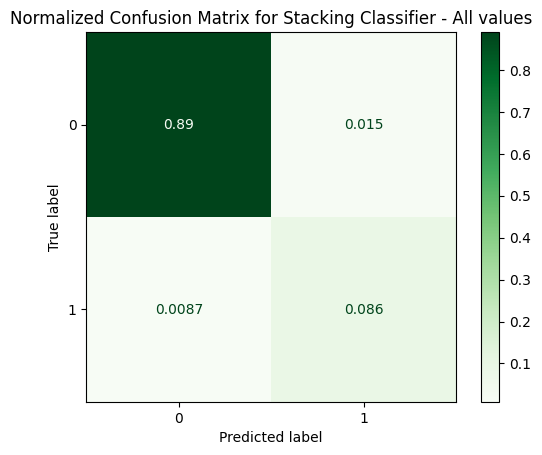

In [121]:
# Generate and print the classification report 
# for the StackingClassifier model on test data
classification_report_stack_clf = metrics.classification_report(np.ravel(ytest), 
                                                               stack_clf.predict(xtest))

print("Classification report for Stacking Classifier on test data: \n\n", classification_report_stack_clf)

# Plot the ROC curve for the optimized XGBoost model
roc_curve_test_stack_clf = metrics.RocCurveDisplay.from_estimator(stack_clf, 
                                                                  xtest, 
                                                                  np.ravel(ytest), 
                                                                  plot_chance_level=True)
plt.title('ROC Curve for Stacking Classifier on test data')
plt.show()

# Display the normalized confusion matrix for recall
ax = metrics.ConfusionMatrixDisplay.from_estimator(stack_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='true', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Stacking Classifier - Recall')
plt.show()

# Display the normalized confusion matrix for precision
ax = metrics.ConfusionMatrixDisplay.from_estimator(stack_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='pred', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Stacking Classifier - Precision')
plt.show()

# Display the normalized confusion matrix for all values
ax = metrics.ConfusionMatrixDisplay.from_estimator(stack_clf, 
                                                   xtest, 
                                                   np.ravel(ytest),
                                                   normalize='all', 
                                                   cmap = 'Greens')
plt.title('Normalized Confusion Matrix for Stacking Classifier - All values')
plt.show()

## 📐 Calibration Plot

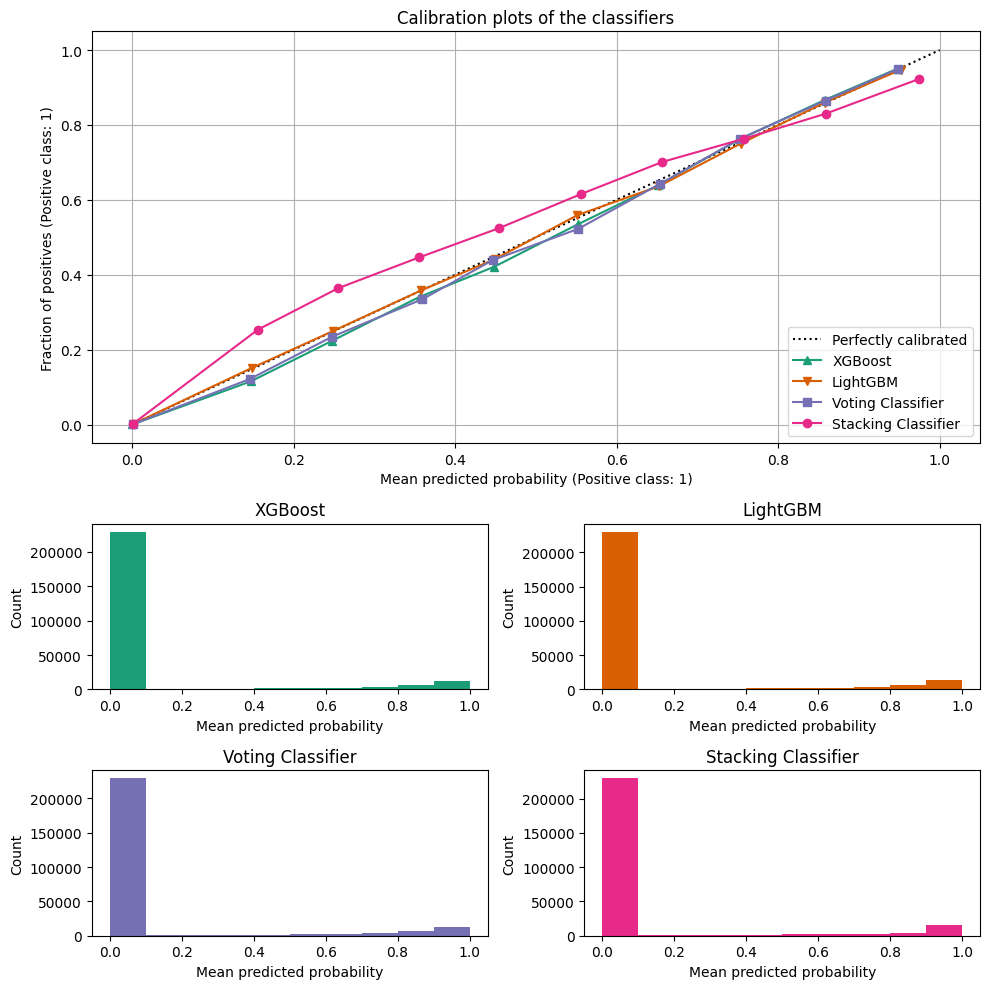

In [122]:
# Define classifiers and their names for calibration plots
clf_list = [
    (xgb_data_preprocess_pipeline, "XGBoost"),
    (lgbm_data_preprocess_pipeline, "LightGBM"),
    (vote_clf, "Voting Classifier"),
    (stack_clf, "Stacking Classifier"),
]

# Set up the figure and grid for subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create the first subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {} # Dictionary to hold calibration display objects
markers = ["^", "v", "s", "o"]  # Different markers for each classifier

# Loop through classifiers to fit and plot calibration curves
for i, (clf, name) in enumerate(clf_list):
    clf.fit(xtrain, np.ravel(ytrain)) # Fit the classifier on train data
    display = CalibrationDisplay.from_estimator(
        clf,
        xtest,
        np.ravel(ytest),
        n_bins=10,               # Number of bins for calibration
        name=name,
        ax=ax_calibration_curve, # Use the same axis for all calibration curves
        color=colors(i),         # Color for the classifier
        marker=markers[i],       # Marker for the classifier
    )
    calibration_displays[name] = display

# Finalize the calibration plot
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots of the classifiers")

# Add histogram for mean predicted probabilities
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)] # Define positions for histograms
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]  # Get row and column for the histogram subplot
    ax = fig.add_subplot(gs[row, col]) # Create subplot

    # Create histogram for predicted probabilities
    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),       # Range of the histogram
        bins=10,            # Number of bins
        label=name,         # Label for the histogram
        color=colors(i),    # Color for the histogram
    )
    ax.set(title=name, 
           xlabel="Mean predicted probability", 
           ylabel="Count")  # Set axis labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## 📈 Conclusion

In this project, we successfully developed a predictive model aimed at classifying entities within the GST system. Through rigorous data preprocessing and the application of advanced machine learning techniques, we achieved notable results across various evaluation metrics, including accuracy, precision, recall, and F1 score. 🎯

The findings of this project underscore the potential of data-driven solutions in enhancing the efficiency of the GST system in India. By leveraging a substantial dataset and employing robust methodologies, we have laid the groundwork for future enhancements in tax compliance and administrative processes. 💡

Moving forward, there are several avenues for improvement and further exploration, such as:

- **Model Optimization**: Fine-tuning hyperparameters to enhance model performance. 🔍
- **Feature Engineering**: Exploring additional features that may improve classification accuracy. ⚙️
- **Deployment**: Implementing the model in a real-world application to test its efficacy in live scenarios. 🚀

I hope this project not only highlights my capabilities in data science but also contributes to meaningful advancements within the GST framework. Thank you for your attention, and I look forward to any feedback or questions! 🙏
